## Classifying Cybersecurity Incidents with Machine Learning

**Problem statement**: Building a machine learning model that predicts the triage grade of cybersecurity incidents (True Positive, Benign Positive, or False Positive). Using historical incident data, the model should help Security Operation Centers (SOCs) classify incidents accurately. The model will be evaluated based on its performance in predicting the correct triage grade using metrics like precision, recall, and macro-F1 score.

**Type of Problem**: Classification

**Target column**: IncidentGrade

### Importing necessary libraries

In [1]:
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import seaborn as sns # for visualisation
import matplotlib.pyplot as plt # for visualization
pd.set_option("display.max_columns",None) # for display max columns

In [2]:
# loading the dataset
df = pd.read_csv("/kaggle/input/guidedataset/GUIDE_Train.csv")

In [3]:
# displaying top 5 rows
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,NaN,NaN,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
# Displaying bottom 5 rows
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,164,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,NaN,NaN,MailMessage,Impacted,98799,138268,360606,160396,441377,270,425863,453297,153085,22919,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,NaN,NaN,Ip,Related,98799,138268,465,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516836,678604833923,16,141721,644106,2024-06-03T23:51:52.000Z,24,348,Exfiltration,NaN,BenignPositive,NaN,NaN,MailMessage,Impacted,98799,138268,360606,160396,441377,206230,425863,453297,153085,325467,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [5]:
# for display rows and columns
df.shape

(9516837, 45)

The dataset contains 9516837 rows and 45 columns

In [6]:
# getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

There are 14 object type columns out of 45  and all others are numerical type 

In [7]:
# Displaying statistical information
df.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.681200e+04,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06
mean,8.425494e+11,1.815800e+02,7.066349e+04,4.065188e+05,1.106724e+02,2.947315e+03,9.566476e+04,1.287191e+05,2.857506e+05,1.503317e+05,3.524466e+05,4.643773e+05,3.409622e+05,3.569664e+05,1.432298e+05,4.800467e+05,3.242503e+09,1.628170e+03,6.347345e+02,8.595601e+02,2.200910e+03,3.342790e+03,8.807955e+02,2.622621e+05,1.076172e+05,3.583477e+03,4.898537e+00,6.465558e+01,2.236742e+02,1.351488e+03,9.936183e+03
std,4.962499e+11,3.867784e+02,1.208369e+05,4.592827e+05,4.351038e+02,1.146150e+04,1.635288e+04,3.399208e+04,1.412240e+05,3.750795e+04,1.664965e+05,2.902275e+05,1.599377e+05,1.744466e+05,3.607056e+04,1.417584e+05,1.034468e+09,6.675012e+01,1.258111e+01,1.886303e+01,3.315528e+02,5.103381e+02,1.291083e+01,8.152956e+04,3.220835e+04,9.020262e+01,7.035099e-01,9.314929e+00,6.279729e+01,3.509808e+02,2.606812e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.927080e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,5.040000e+02,2.324200e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,9.258300e+04,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,2.762798e+09,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.033600e+04,2.166520e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,3.504264e+09,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.432900e+04,6.715770e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,4.107006e+09,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.147000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,4.294967e+09,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [8]:
# getting statistical summary for object type
df.describe(include="O")

,Timestamp,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,ThreatFamily,ResourceType,Roles,AntispamDirection,SuspicionLevel,LastVerdict
count,9516837,9516837,4048451,9465497,56064,56064,9516837,9516837,74881,7075,218151,177302,1444129,2234265
unique,760944,20,1193,3,3,16,33,2,1745,25,10,5,2,5
top,2024-06-12T01:27:49.000Z,InitialAccess,T1078;T1078.004,BenignPositive,ContainAccount,update stsrefreshtokenvalidfrom timestamp.,Ip,Related,Phish,Virtual Machine,Contextual,Inbound,Suspicious,Suspicious
freq,11292,4293041,1354904,4110817,53760,21393,2181194,5208644,3526,4146,130528,161111,1442614,1402997


In [9]:
# categorize the data into numerical and categorical
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [10]:
# all numerical columns
numeric_features

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'DetectorId',
 'AlertTitle',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'OSFamily',
 'OSVersion',
 'CountryCode',
 'State',
 'City']

In [11]:
# all categorical features
categorical_features

['Timestamp',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'ThreatFamily',
 'ResourceType',
 'Roles',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict']

In [12]:
# EDA

In [13]:
# Checking Null values
df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

Missing values present in 11 columns and most of them are more than 70%

In [14]:
# unique values in the categorical columns
for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: Timestamp
['2024-06-04T06:05:15.000Z' '2024-06-14T03:01:25.000Z'
 '2024-06-13T04:52:55.000Z' ... '2024-06-06T20:57:03.000Z'
 '2024-06-05T01:45:10.000Z' '2024-06-08T15:20:34.000Z']
----------------------------------------
Column: Category
['InitialAccess' 'Exfiltration' 'CommandAndControl' 'Execution'
 'SuspiciousActivity' 'Impact' 'Collection' 'CredentialAccess'
 'Persistence' 'Discovery' 'Malware' 'DefenseEvasion' 'Exploit'
 'PrivilegeEscalation' 'LateralMovement' 'Ransomware' 'UnwantedSoftware'
 'CredentialStealing' 'WebExploit' 'Weaponization']
----------------------------------------
Column: MitreTechniques
[nan 'T1189' 'T1078;T1078.004' ...
 'T1055;T1055.002;T1055.004;T1055.012;T1071;T1106' 'T1566;T0865;T1650'
 'T1078;T1078.001']
----------------------------------------
Column: IncidentGrade
['TruePositive' 'FalsePositive' 'BenignPositive' nan]
----------------------------------------
Column: ActionGrouped
[nan 'ContainAccount' 'IsolateDevice' 'Stop Virtual Machines']
----

In [15]:
# number of unique values in the categorical columns
for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].nunique())
    print("-" * 40)

Column: Timestamp
760944
----------------------------------------
Column: Category
20
----------------------------------------
Column: MitreTechniques
1193
----------------------------------------
Column: IncidentGrade
3
----------------------------------------
Column: ActionGrouped
3
----------------------------------------
Column: ActionGranular
16
----------------------------------------
Column: EntityType
33
----------------------------------------
Column: EvidenceRole
2
----------------------------------------
Column: ThreatFamily
1745
----------------------------------------
Column: ResourceType
25
----------------------------------------
Column: Roles
10
----------------------------------------
Column: AntispamDirection
5
----------------------------------------
Column: SuspicionLevel
2
----------------------------------------
Column: LastVerdict
5
----------------------------------------


In [16]:
# number of unique values in the numerical columns
for col in numeric_features:
    print(f"Column: {col}")
    print(df[col].nunique())
    print("-" * 40)

Column: Id
730778
----------------------------------------
Column: OrgId
5769
----------------------------------------
Column: IncidentId
466151
----------------------------------------
Column: AlertId
1265644
----------------------------------------
Column: DetectorId
8428
----------------------------------------
Column: AlertTitle
86149
----------------------------------------
Column: DeviceId
75826
----------------------------------------
Column: Sha256
106416
----------------------------------------
Column: IpAddress
285957
----------------------------------------
Column: Url
123252
----------------------------------------
Column: AccountSid
358401
----------------------------------------
Column: AccountUpn
530183
----------------------------------------
Column: AccountObjectId
343516
----------------------------------------
Column: AccountName
368250
----------------------------------------
Column: DeviceName
114541
----------------------------------------
Column: NetworkMessageId

In [17]:
# value counts of each category in IncidentGrade
df.IncidentGrade.value_counts()

IncidentGrade
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64

Here we can see the classes are not imbalance 

In [18]:
# Count plot for the taget column couIncidentGrade 

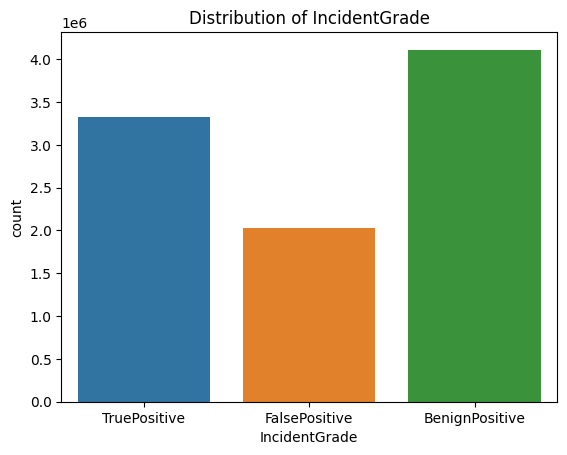

In [19]:
sns.countplot(data=df, x='IncidentGrade')
plt.title('Distribution of IncidentGrade')
plt.show()

number of counts of each category in target column IncidentGrade
BenignPositive=4110817
TruePositive=3322713
FalsePositive=2031967

In [20]:
cat_col=["Category", "ActionGrouped", "ActionGranular", "EntityType", "EvidenceRole", "ResourceType","Roles", "AntispamDirection", "SuspicionLevel", "LastVerdict"]

### Count plots for all categorical columns

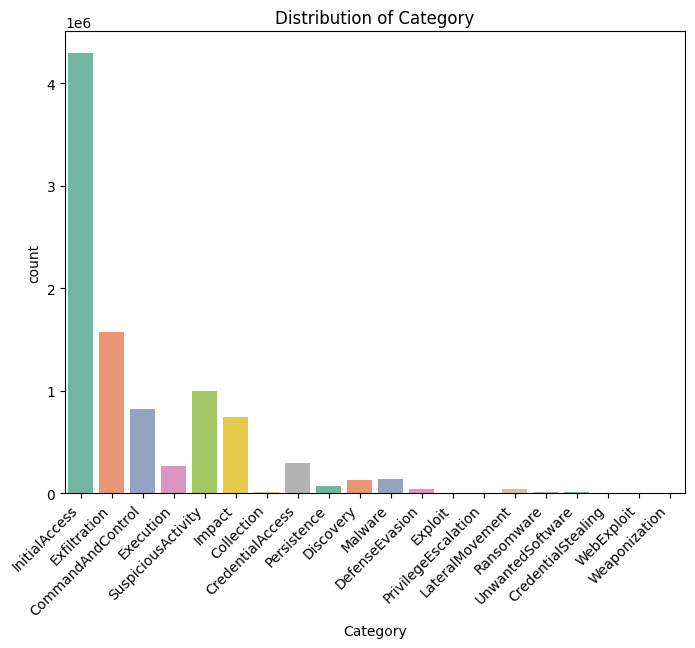

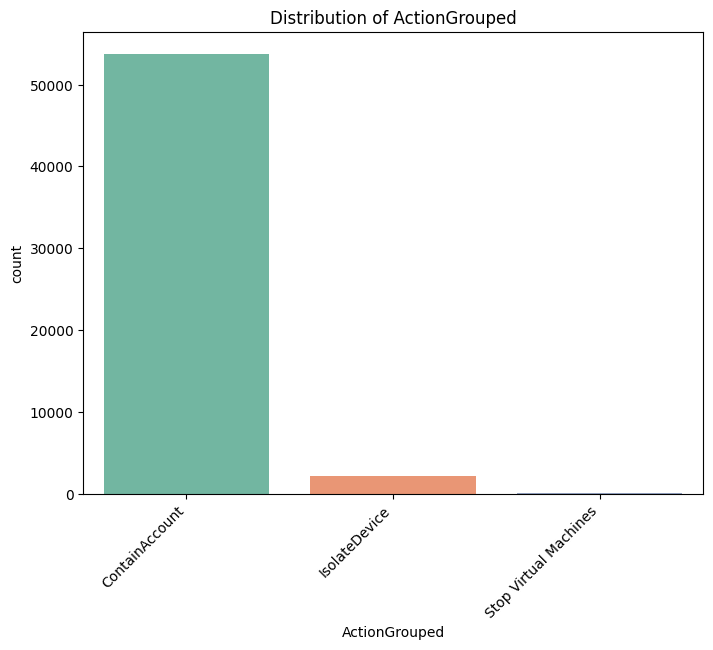

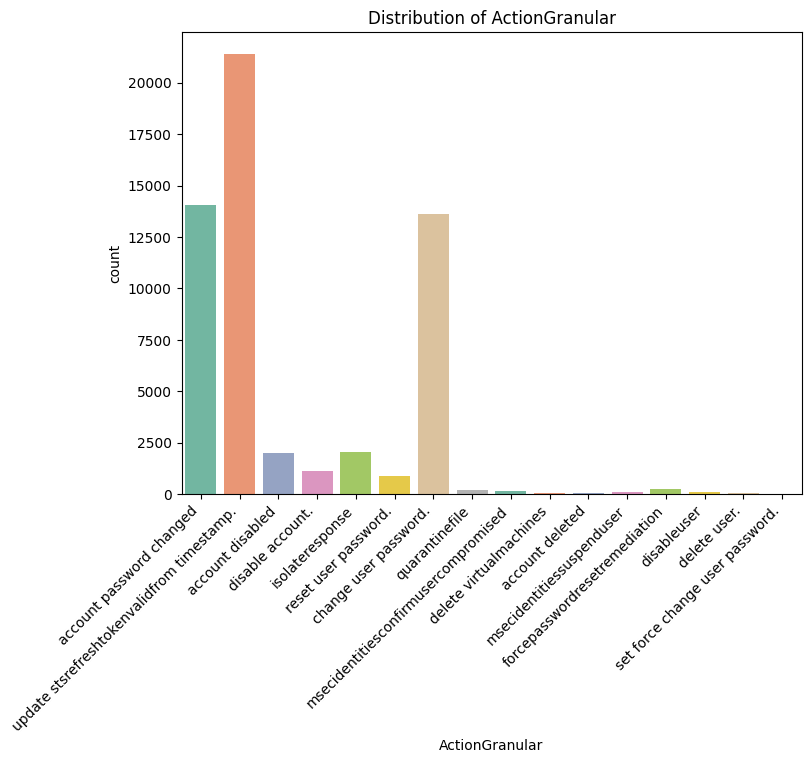

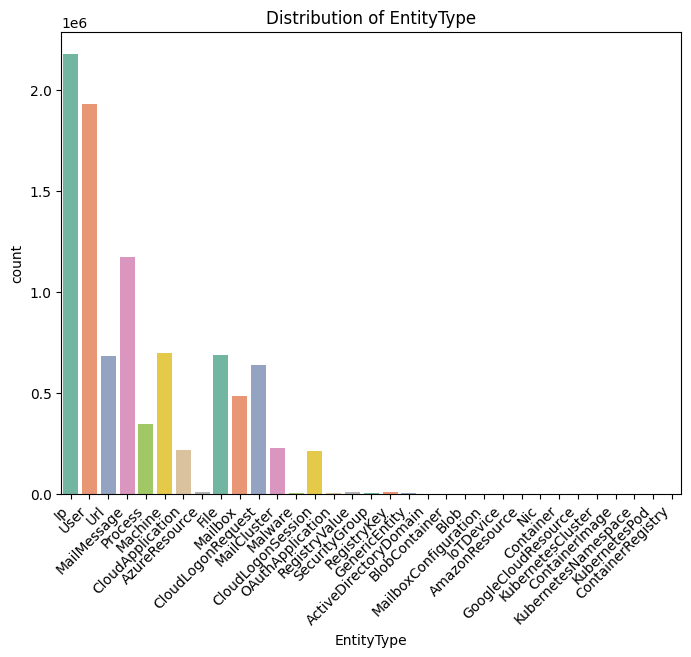

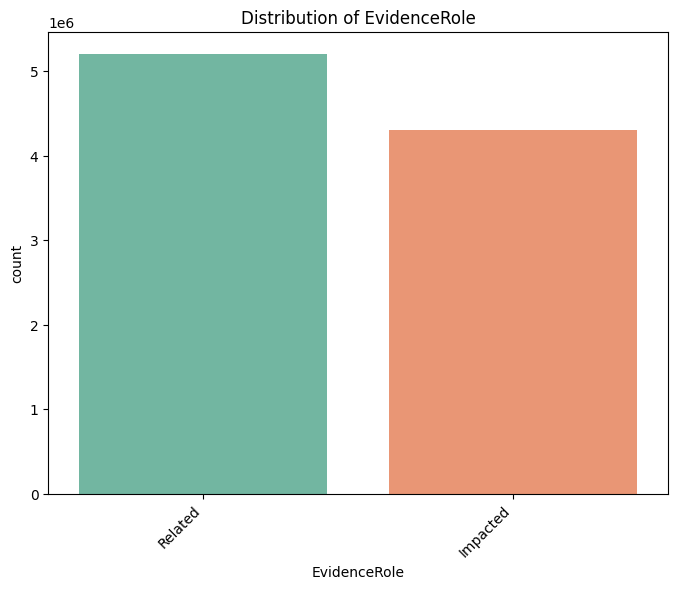

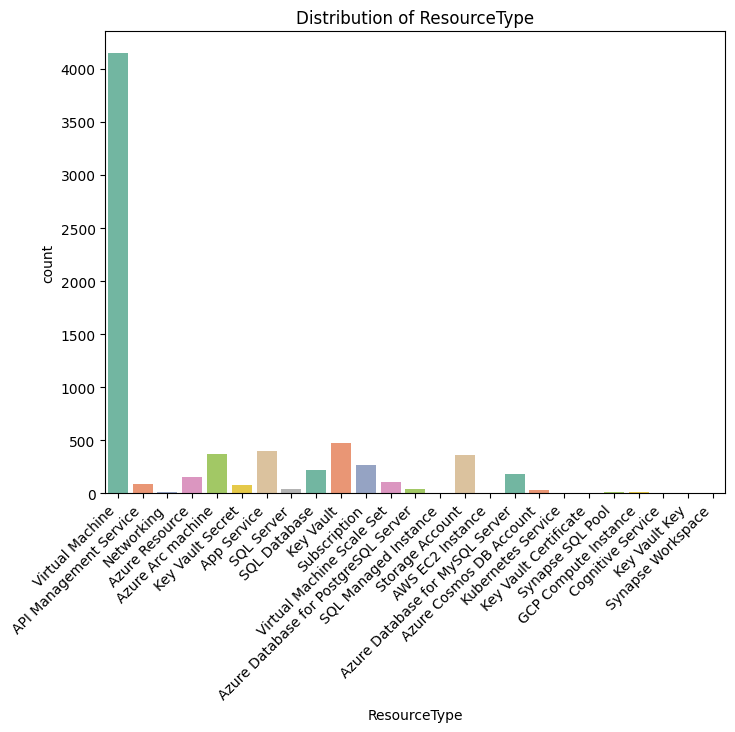

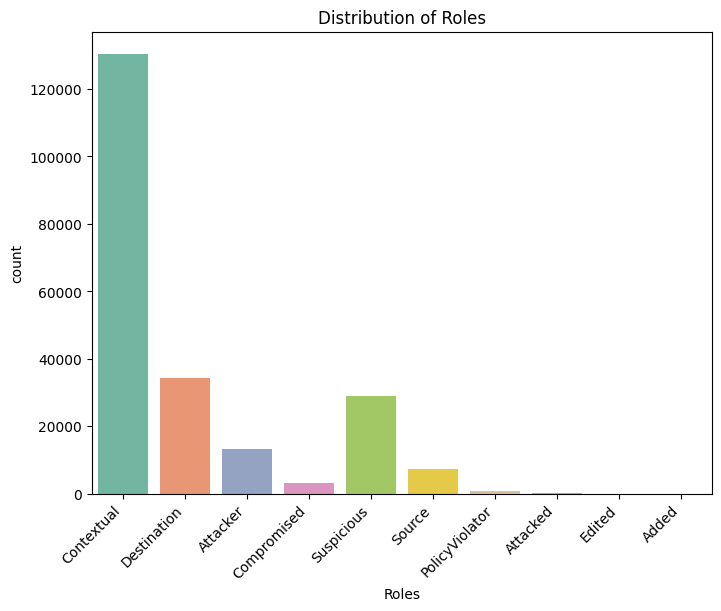

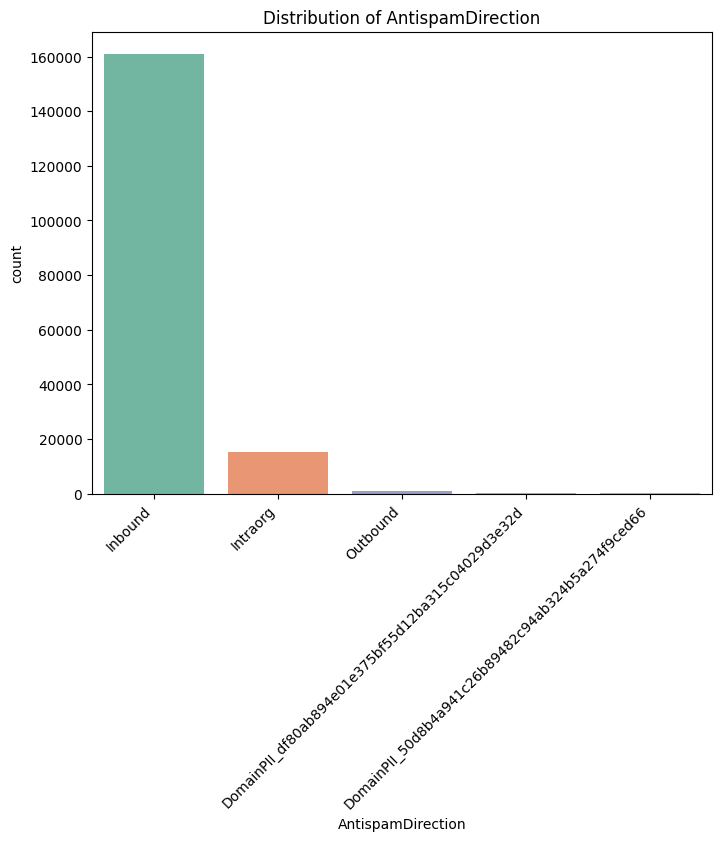

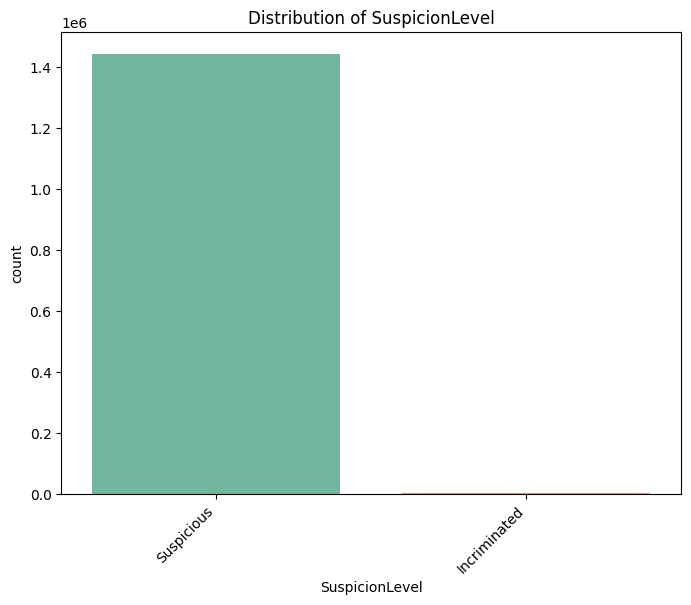

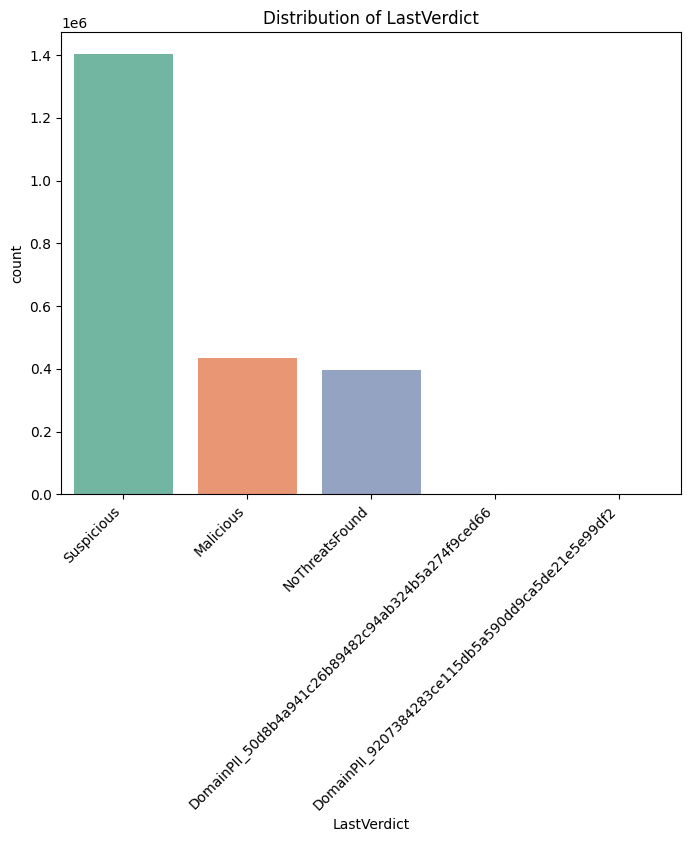

In [21]:
for col in cat_col:
    plt.figure(figsize=(8, 6))  
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha="right")  
    plt.show()

### Histogram for all the numerical columns

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


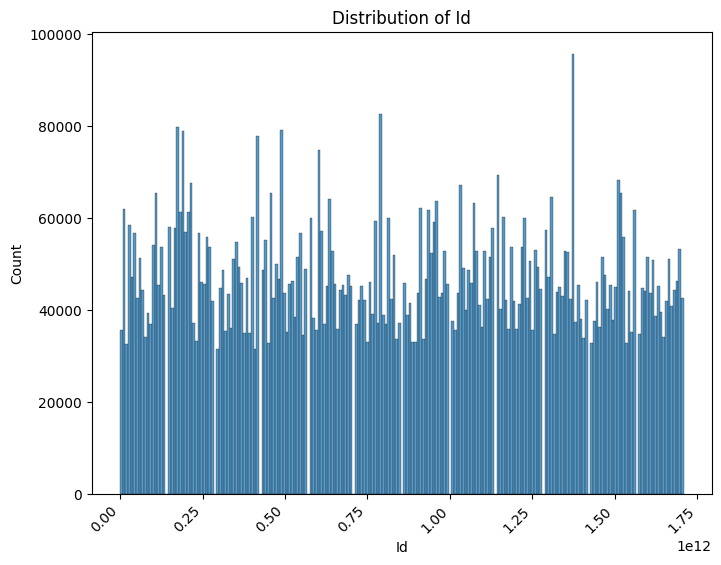

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


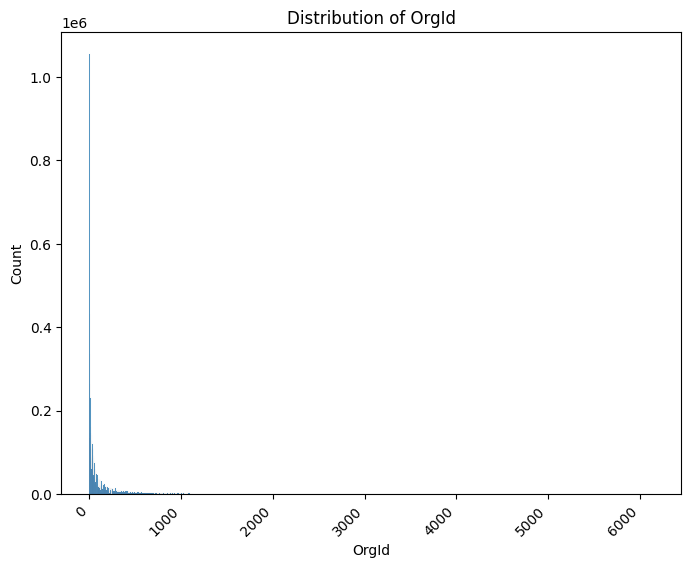

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


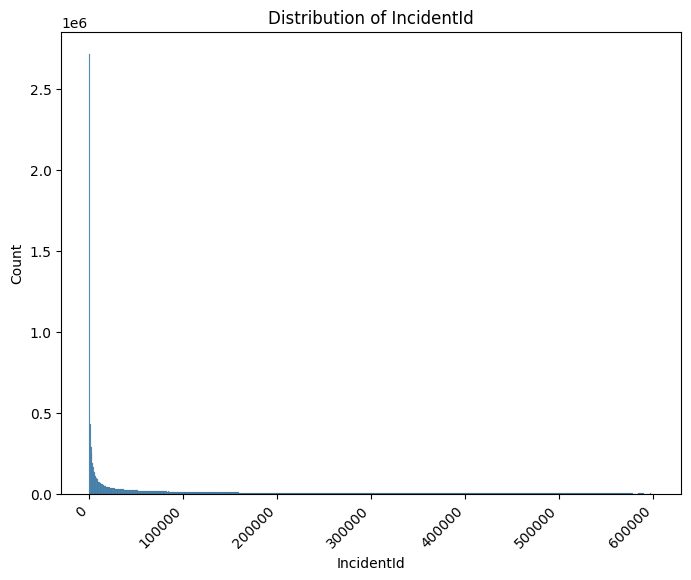

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


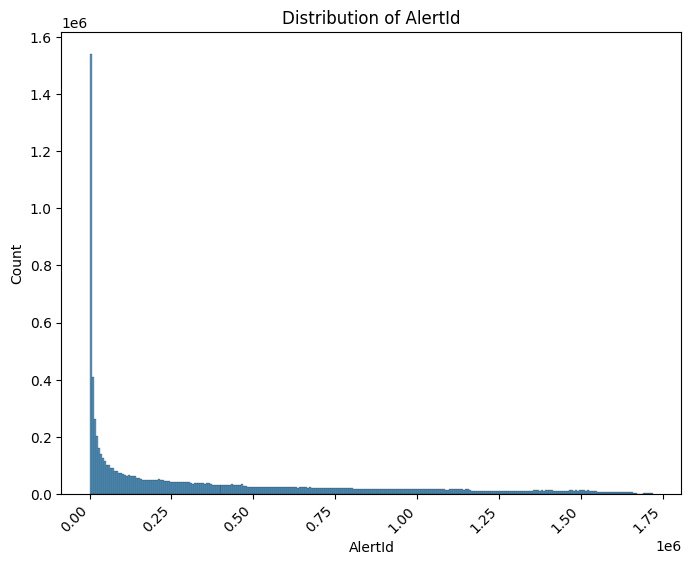

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


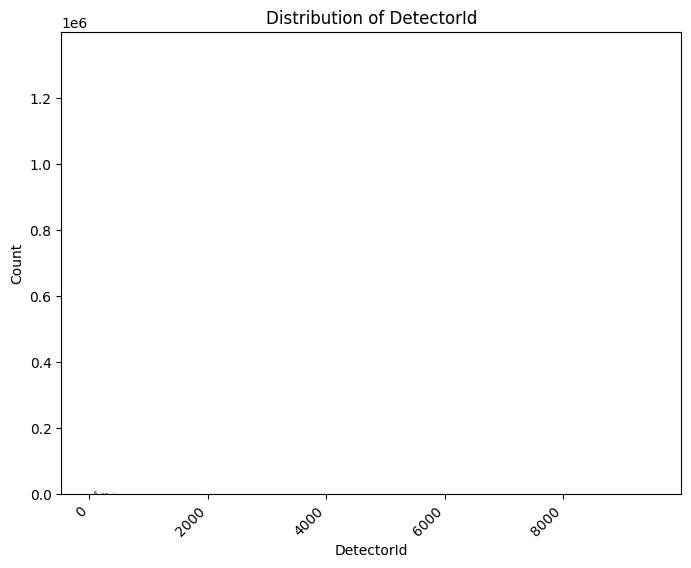

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


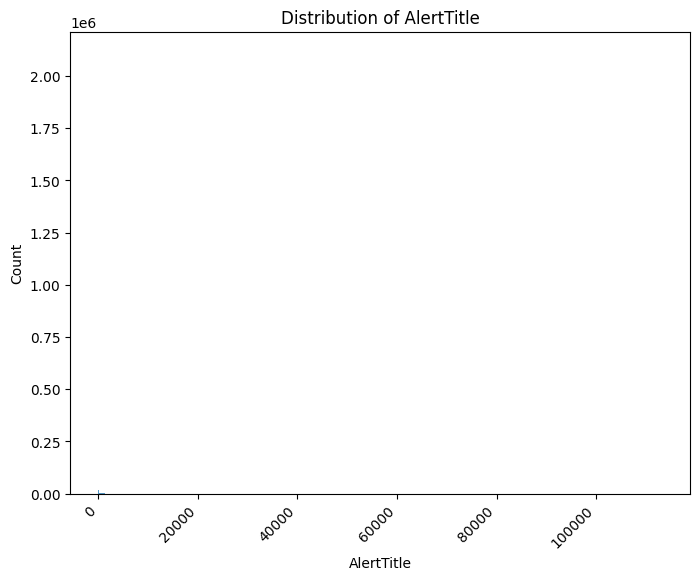

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


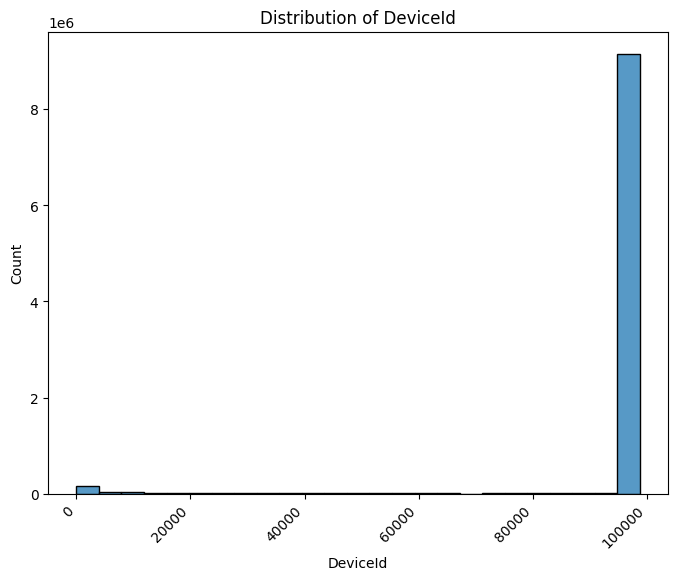

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


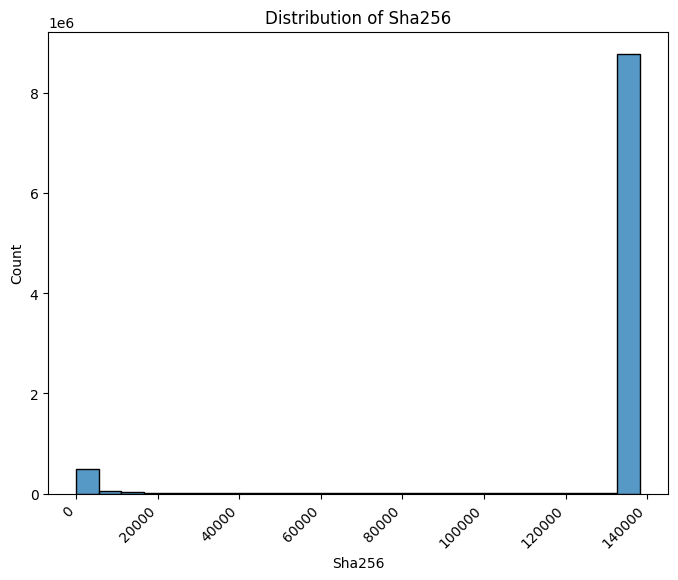

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


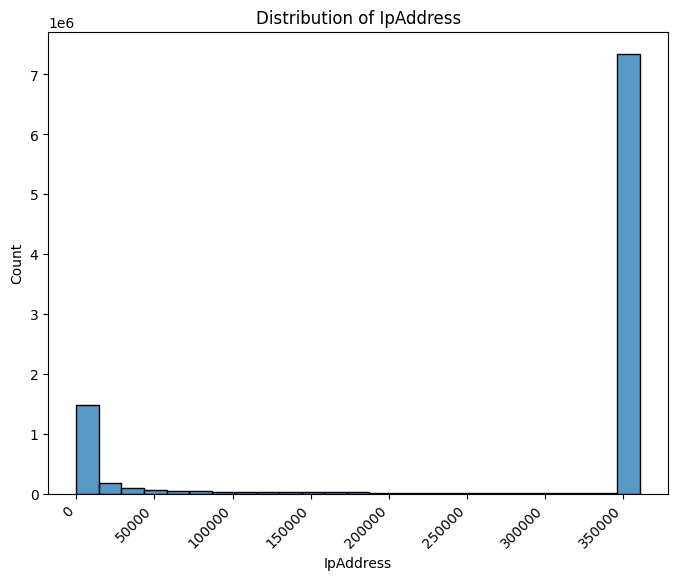

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


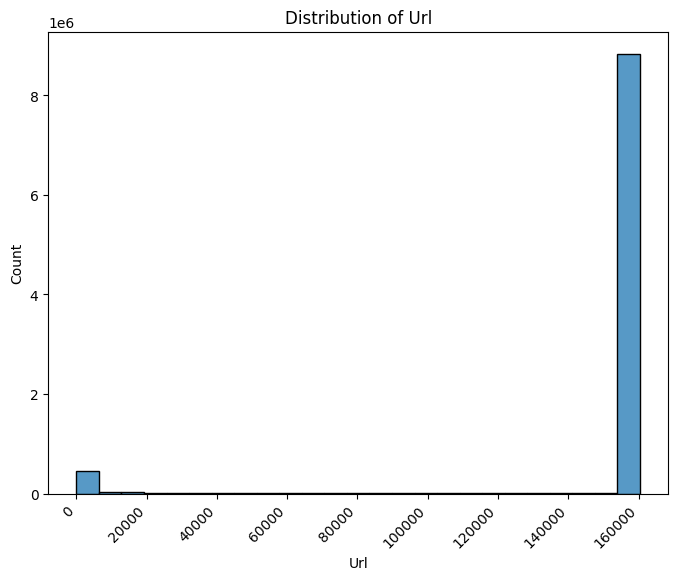

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


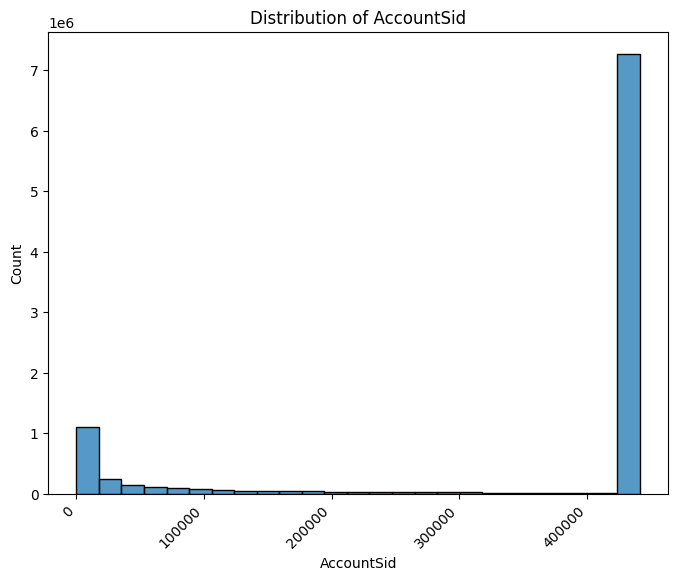

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


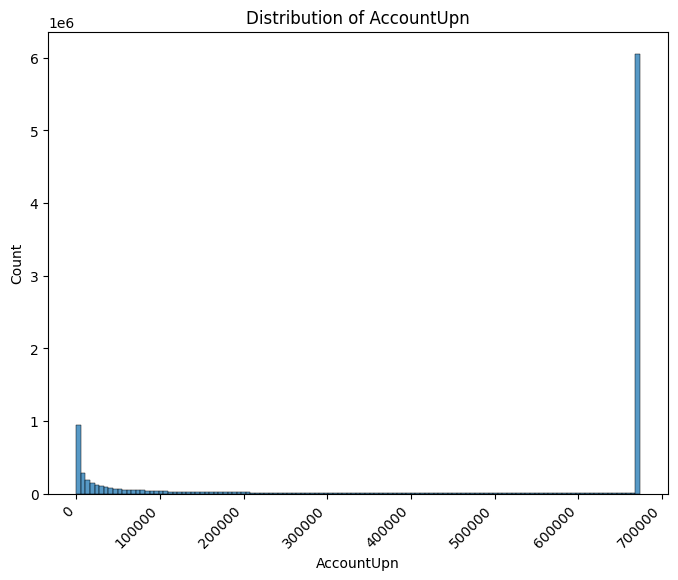

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


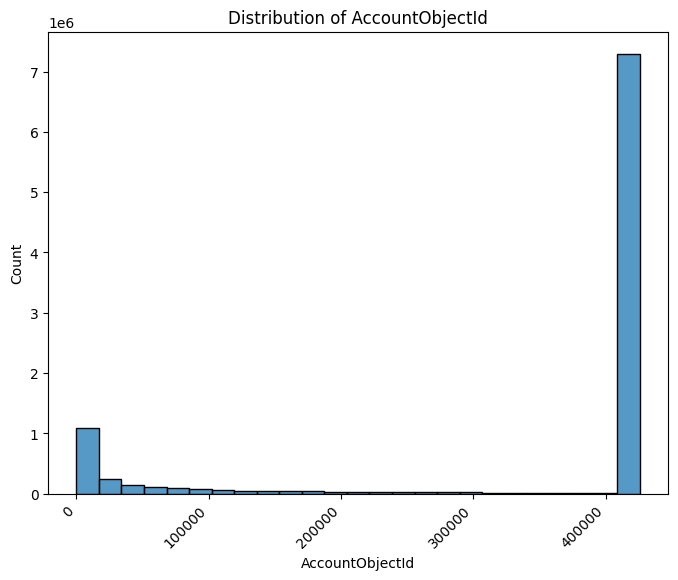

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


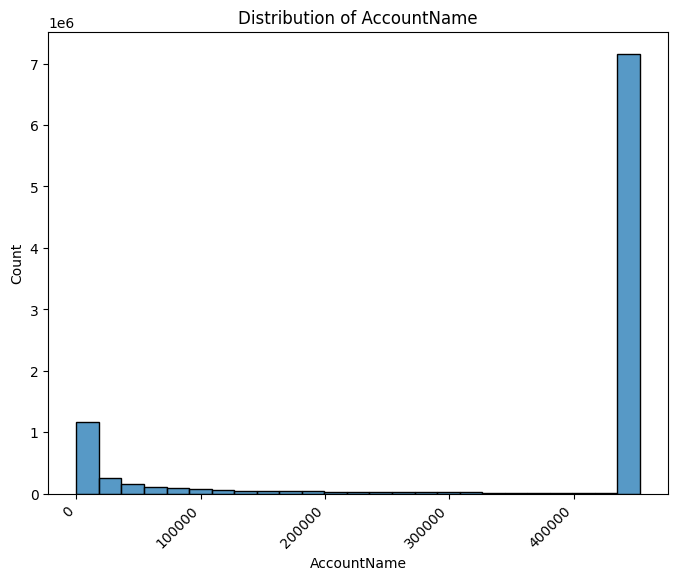

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


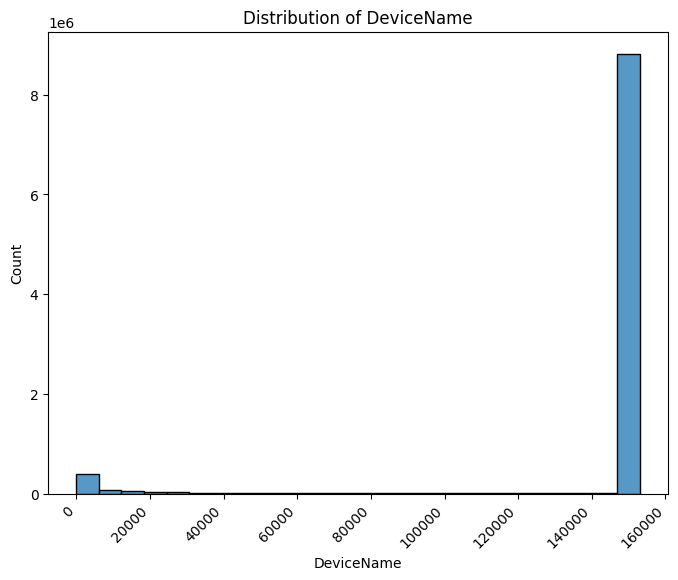

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


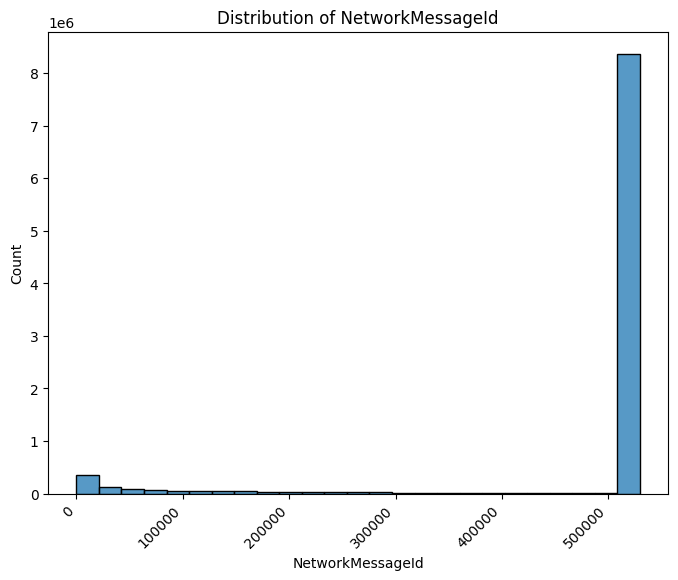

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


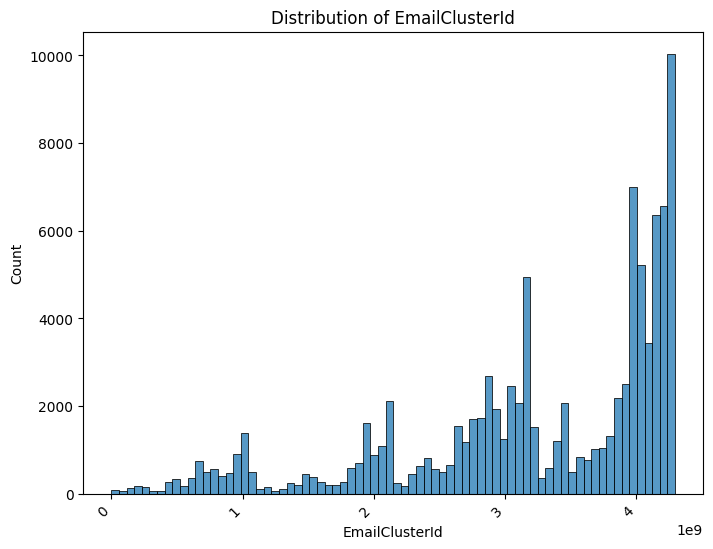

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


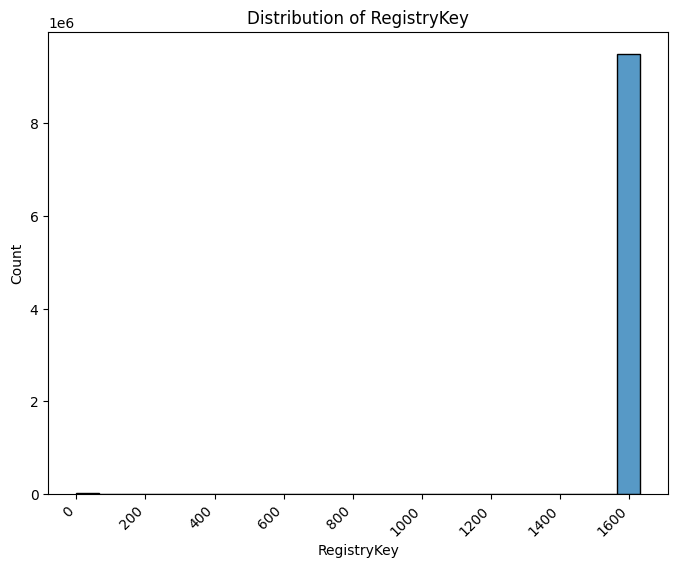

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


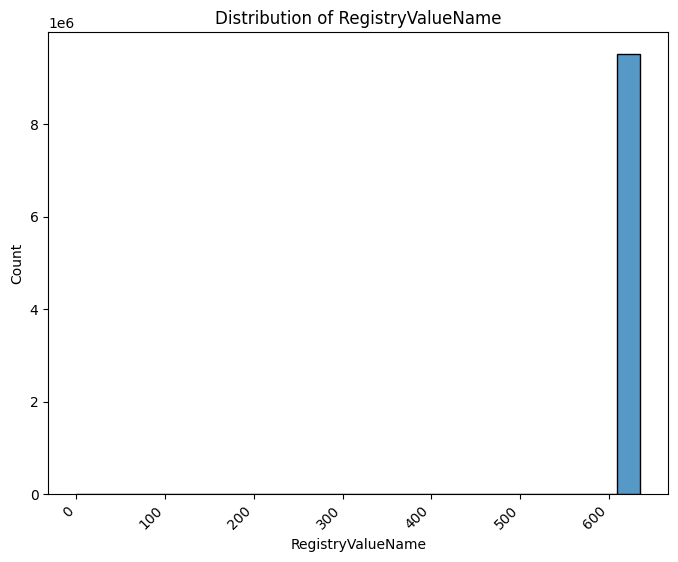

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


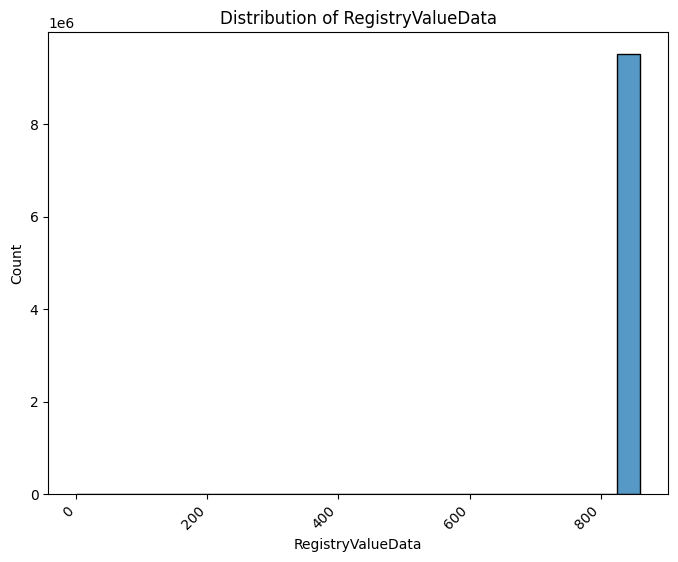

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


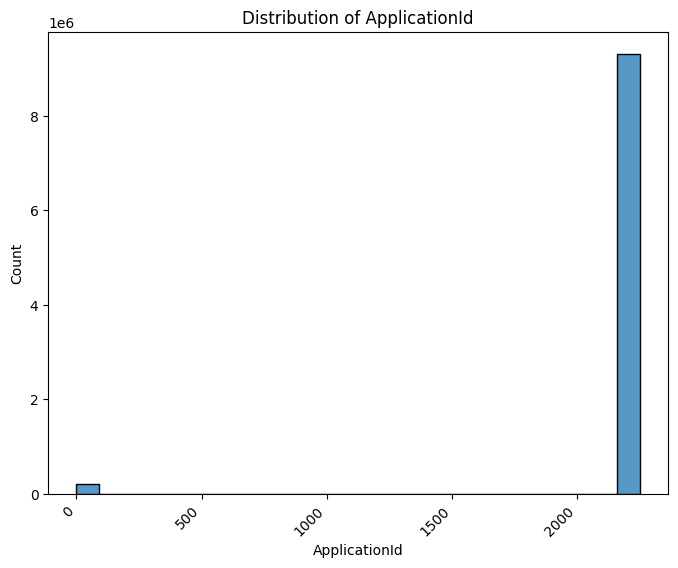

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


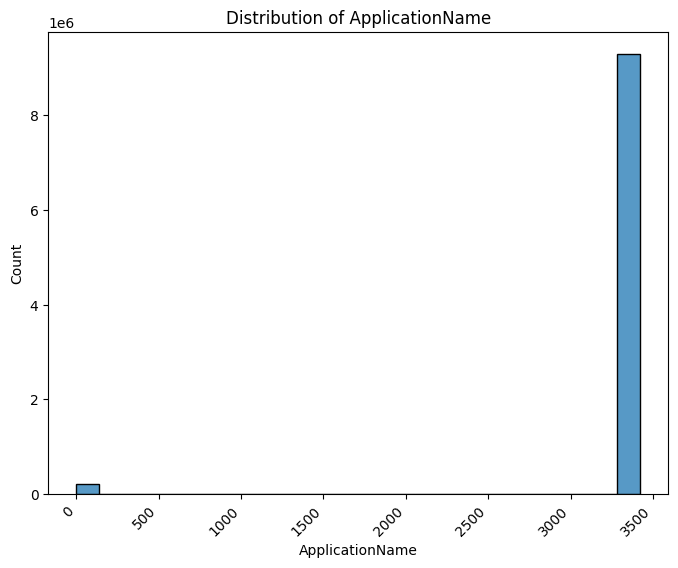

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


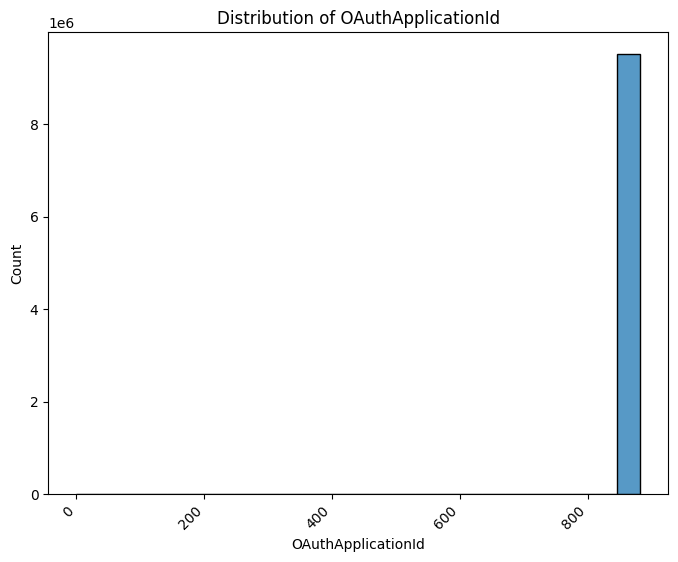

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


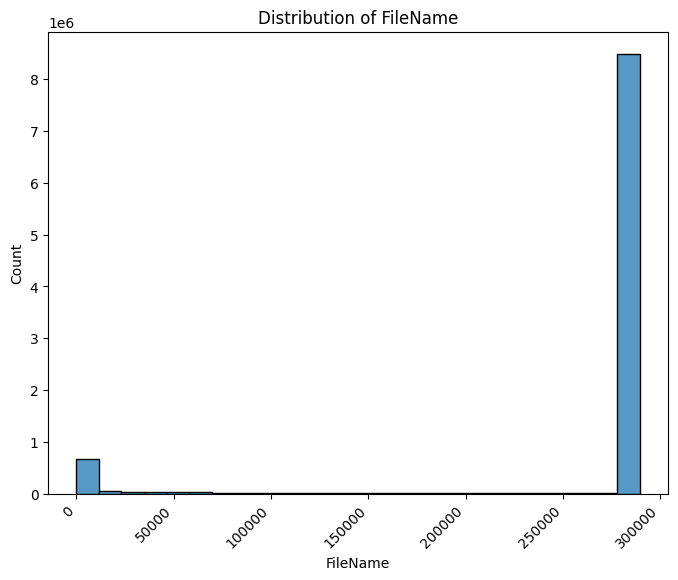

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


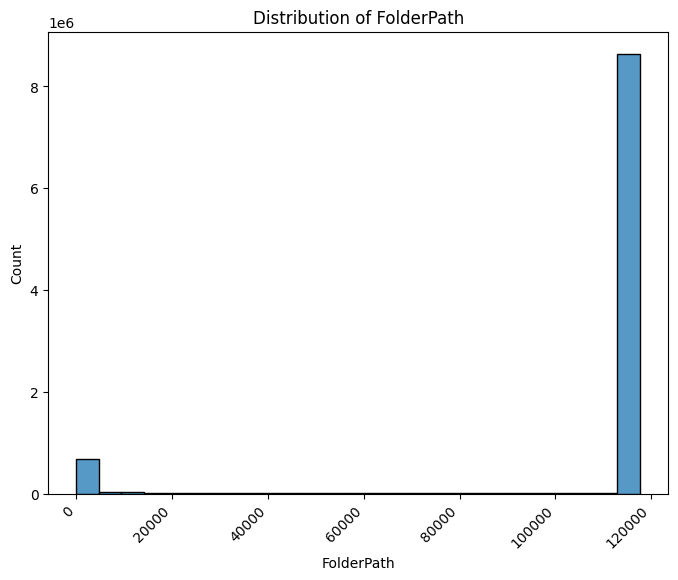

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


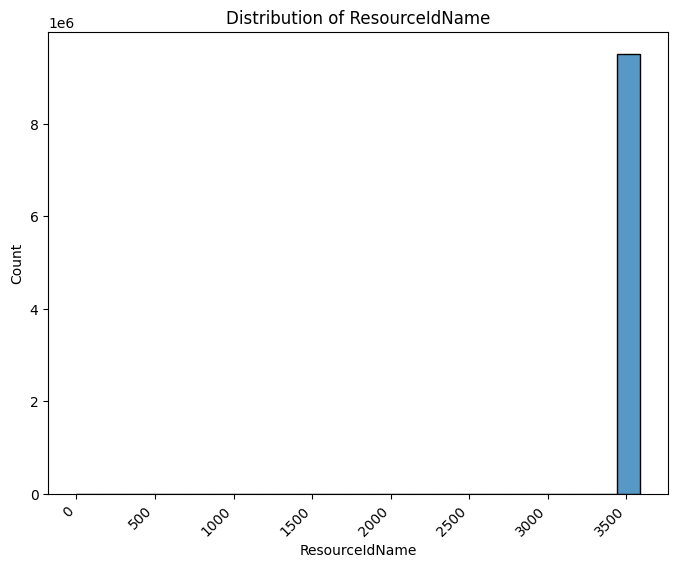

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


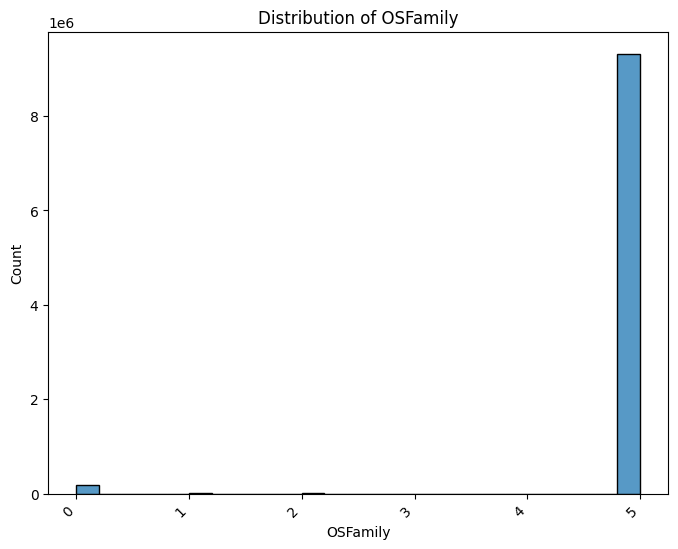

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


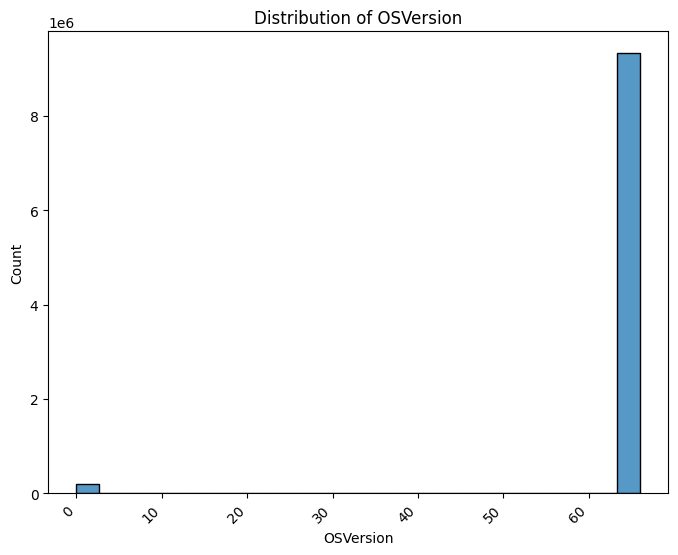

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


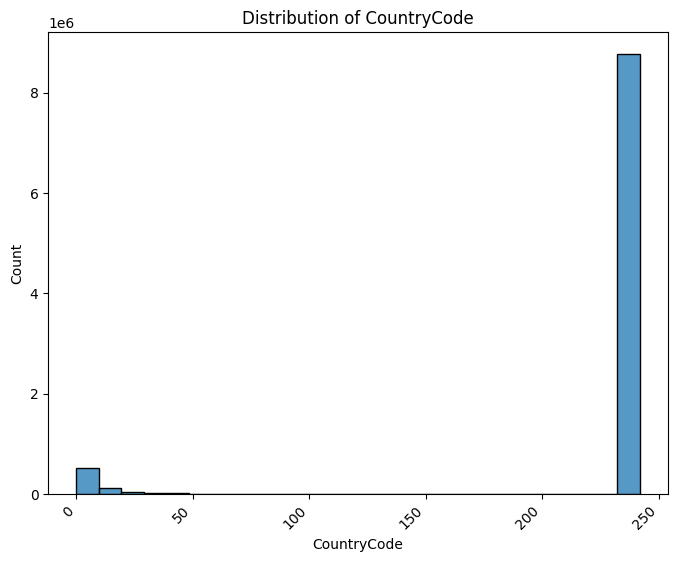

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


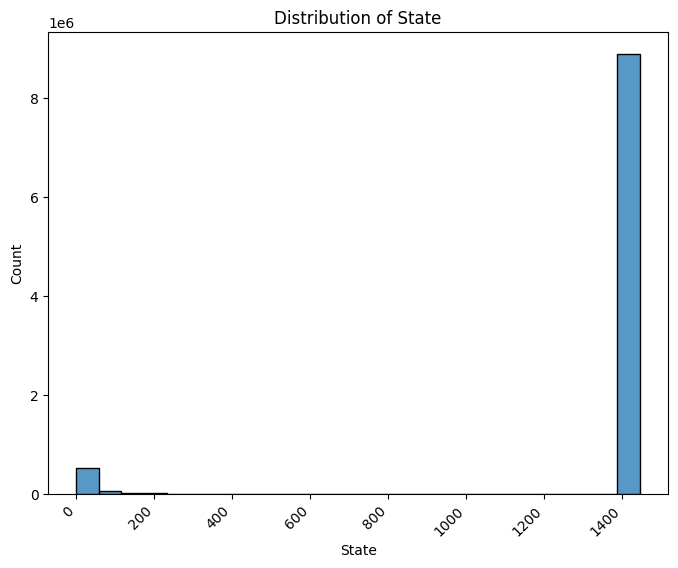

/tmp/ipykernel_31/1916239982.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


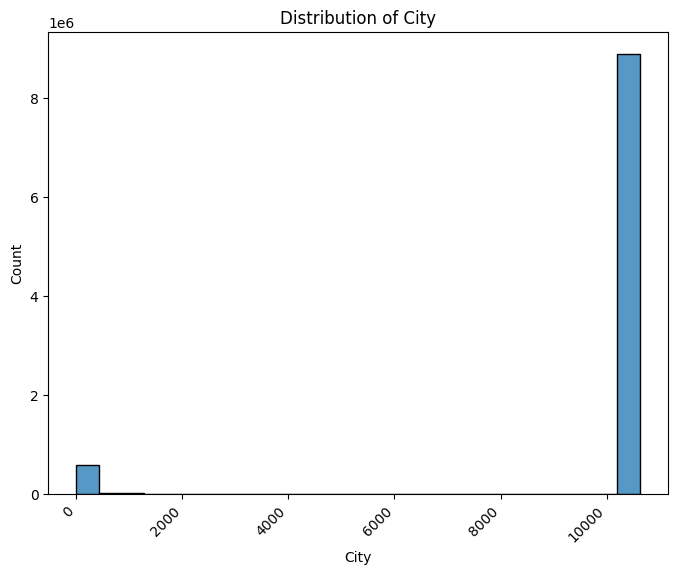

In [22]:
for col in numeric_features:
    plt.figure(figsize=(8, 6))  
    sns.histplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha="right")  
    plt.show()

### Box plot for all numerical columns

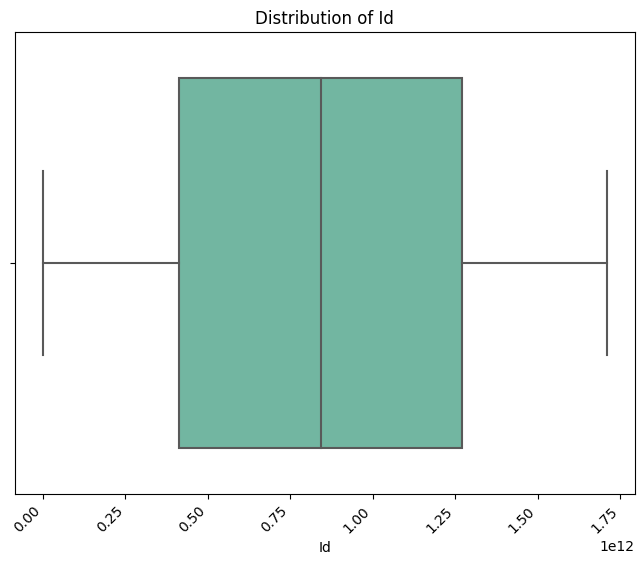

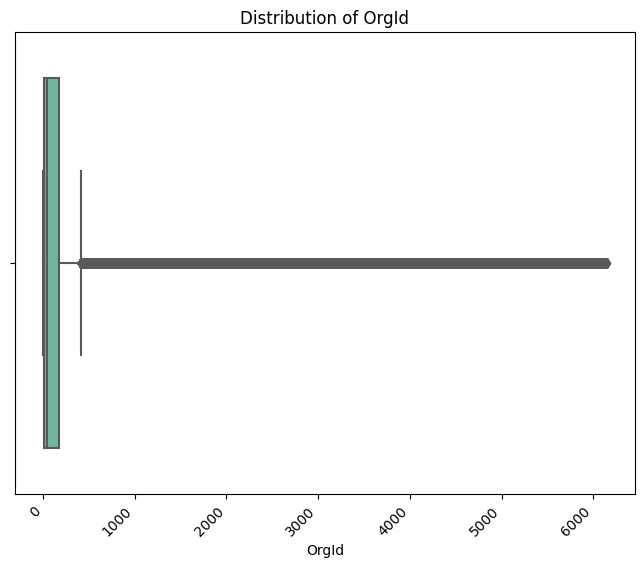

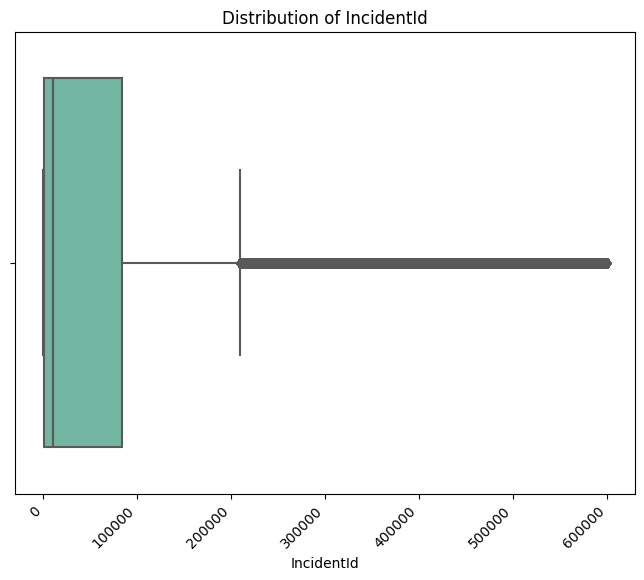

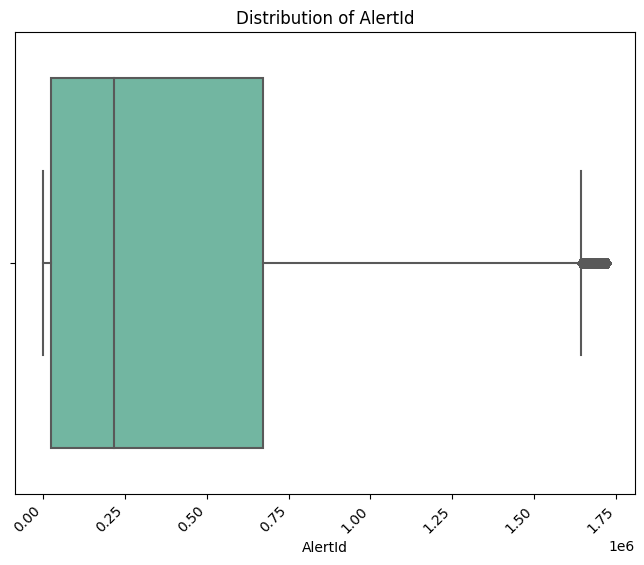

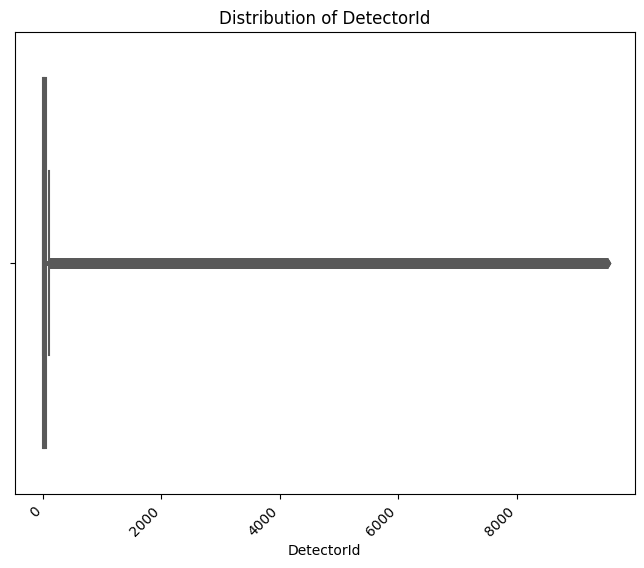

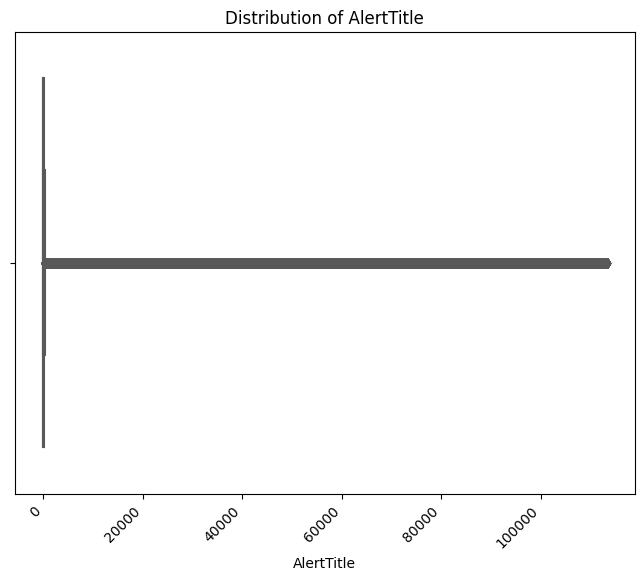

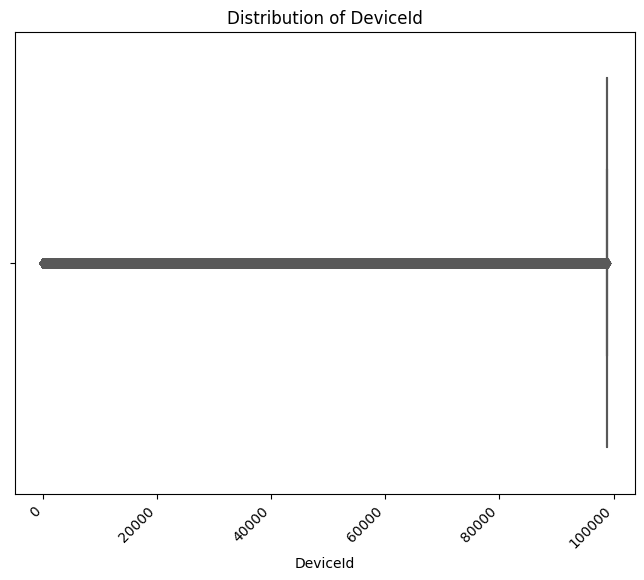

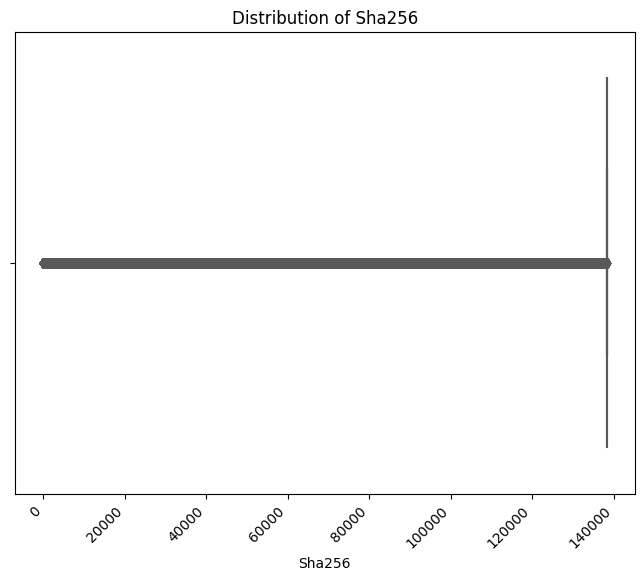

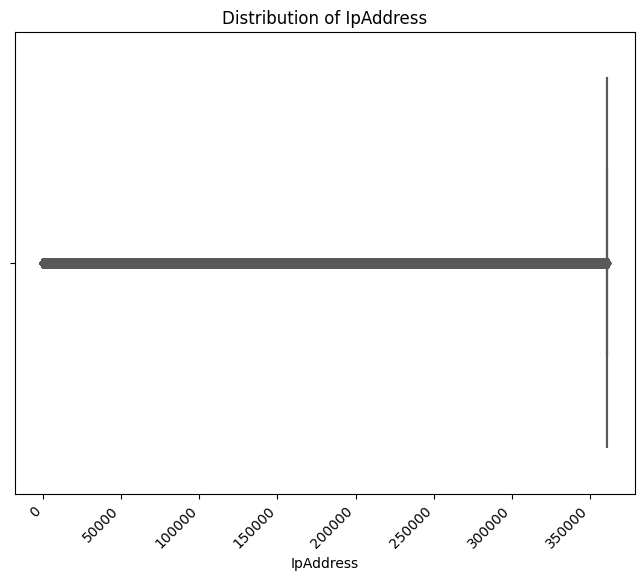

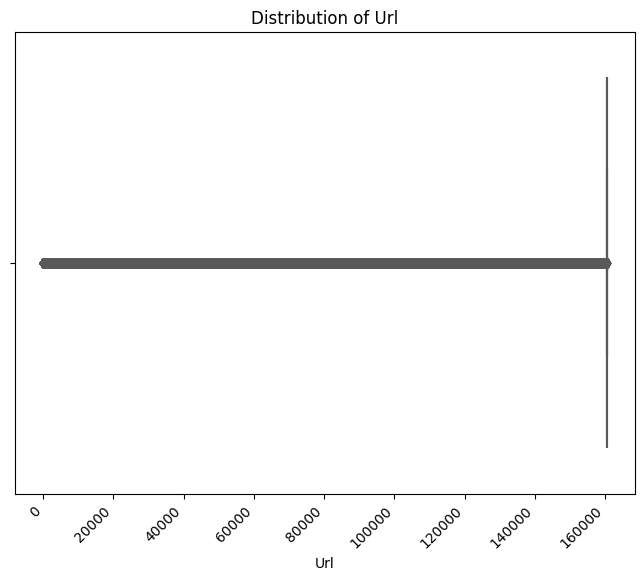

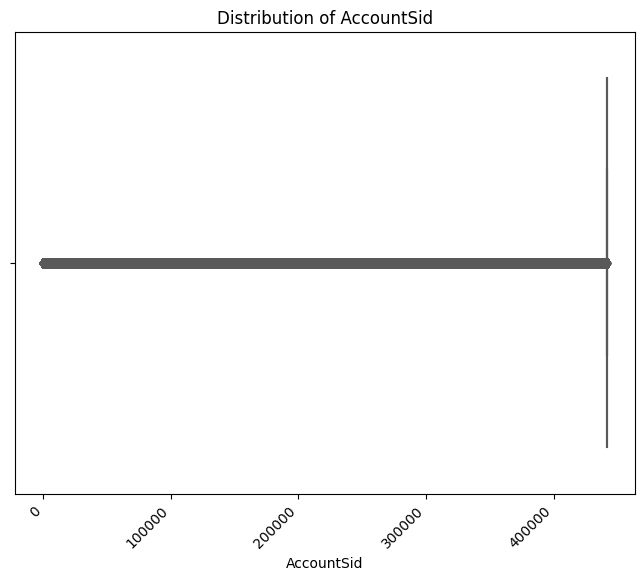

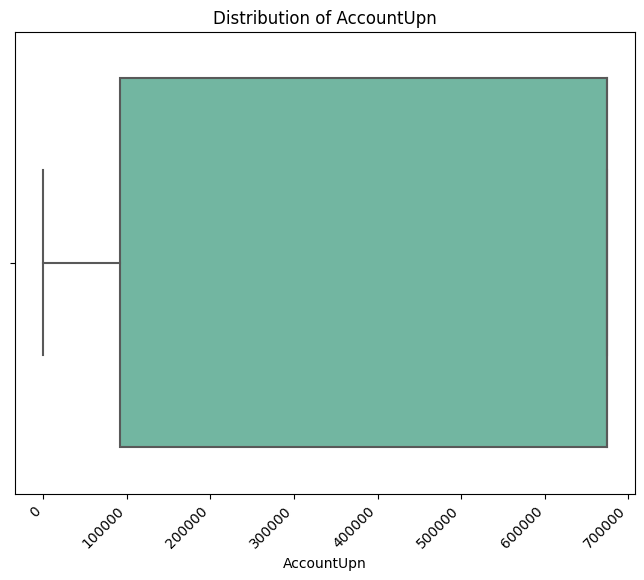

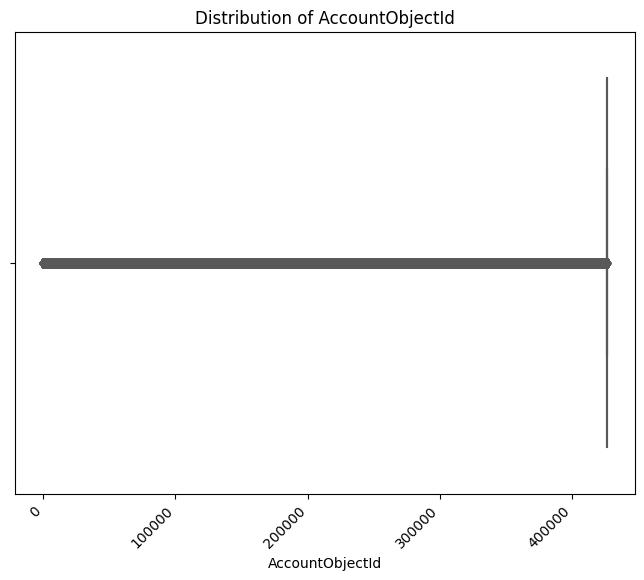

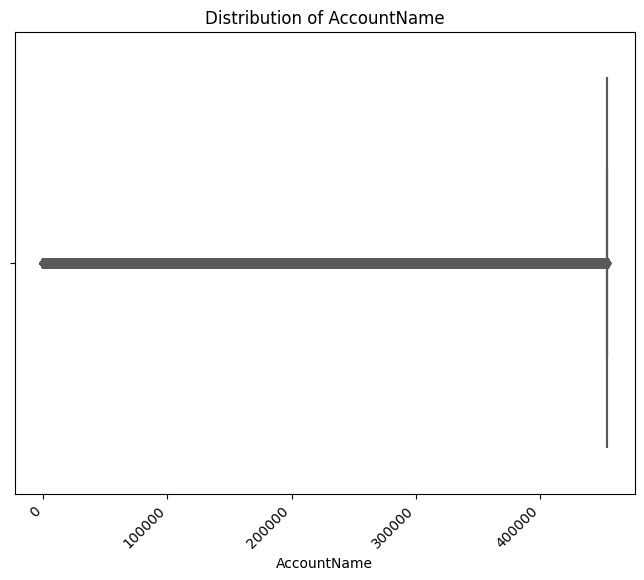

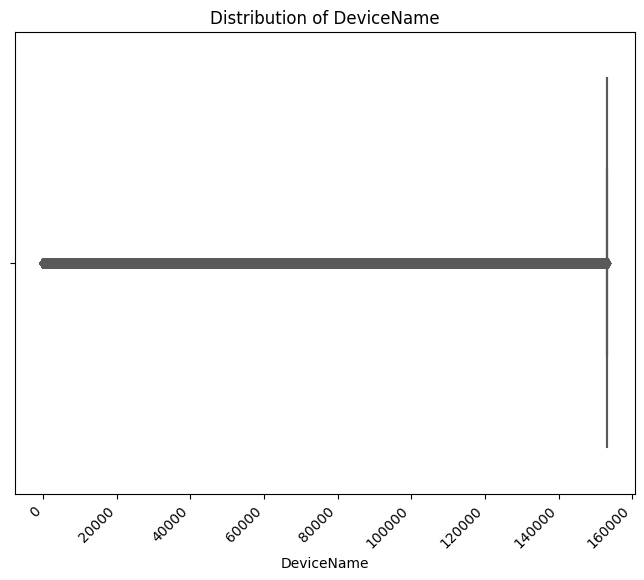

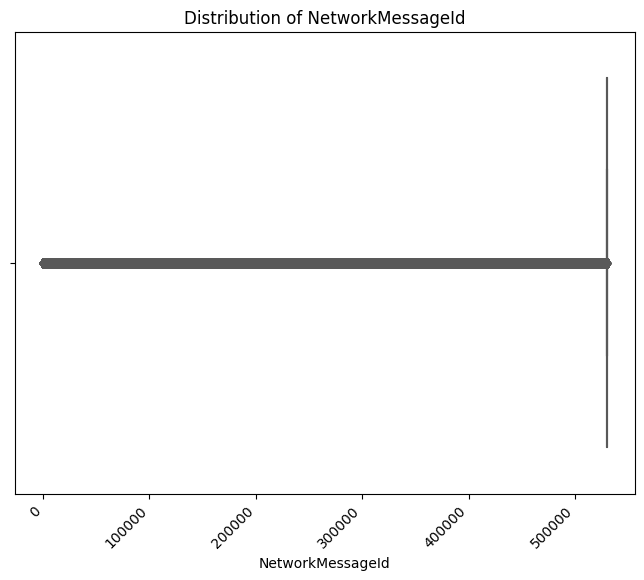

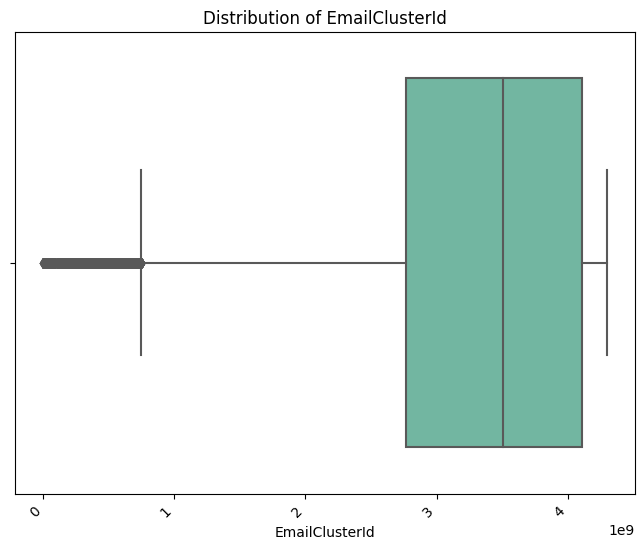

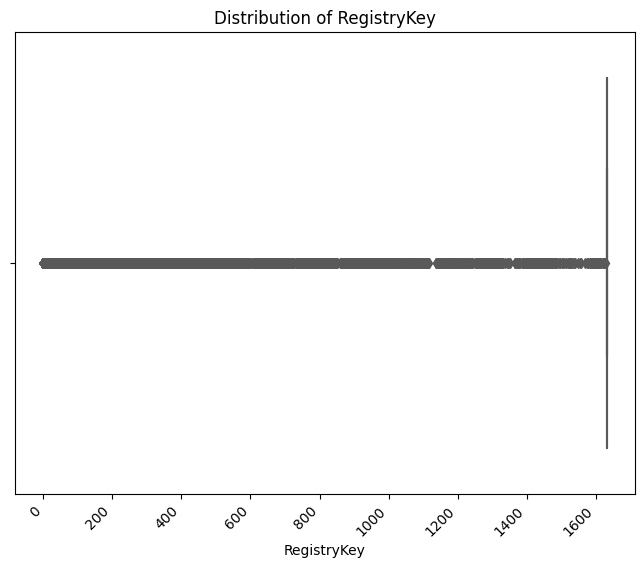

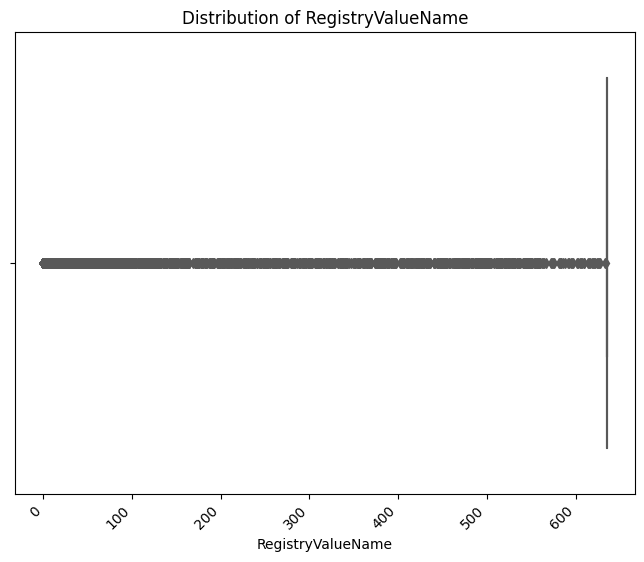

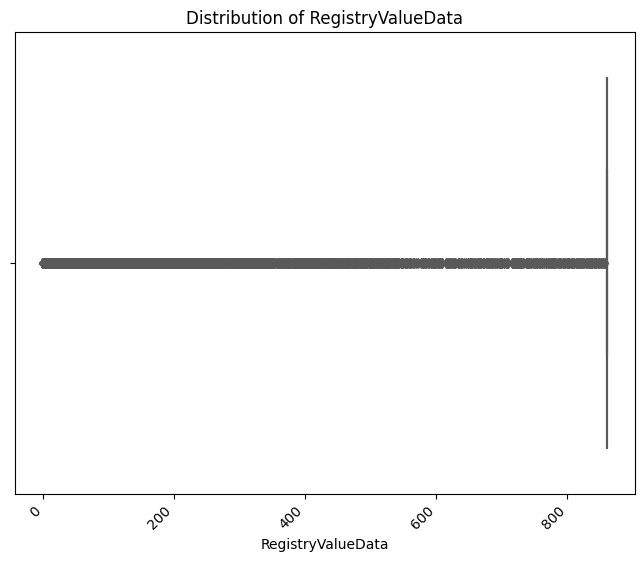

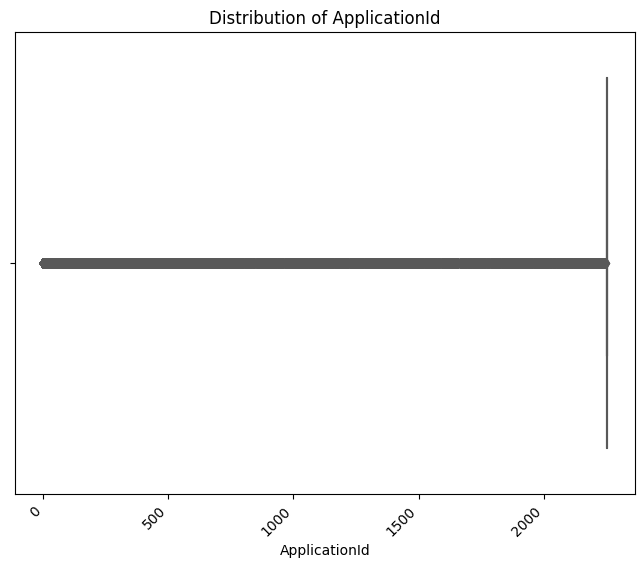

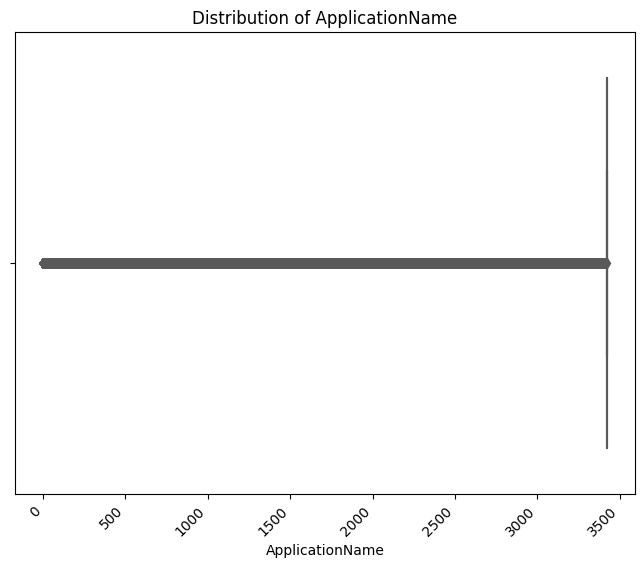

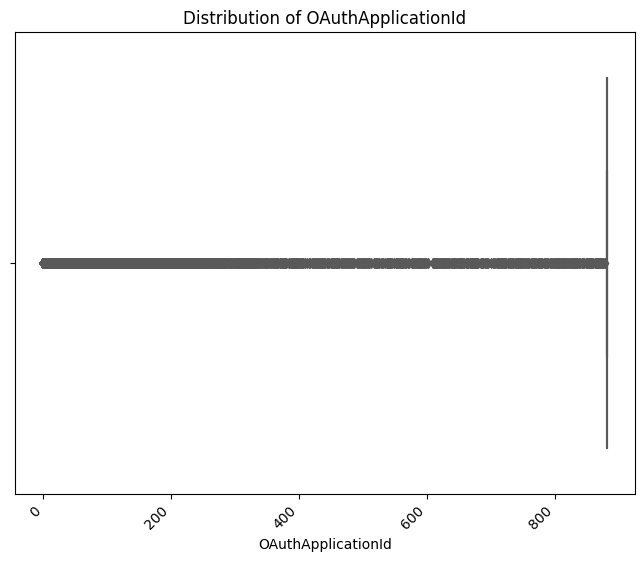

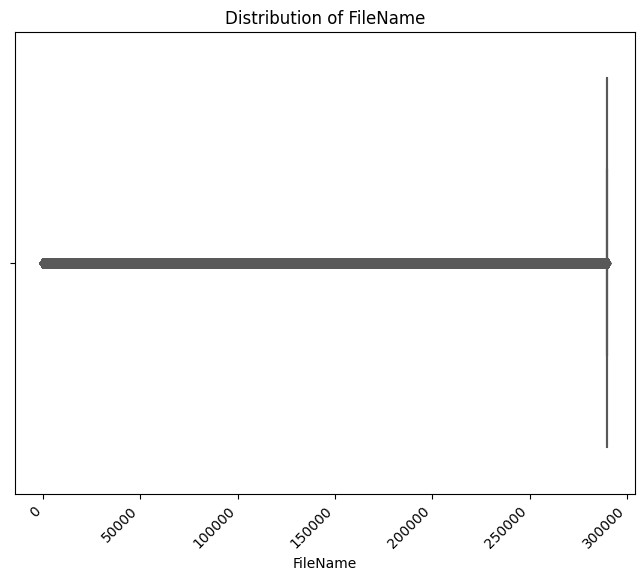

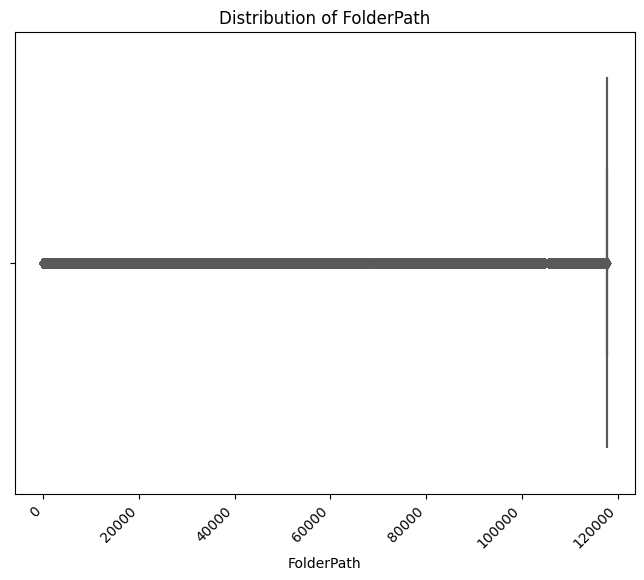

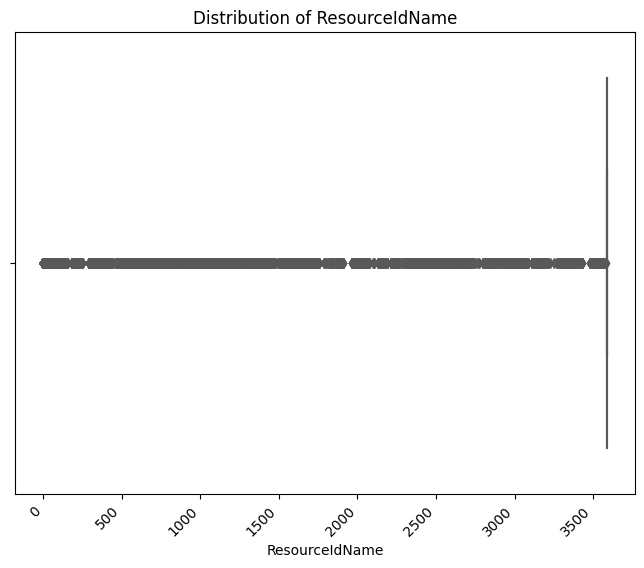

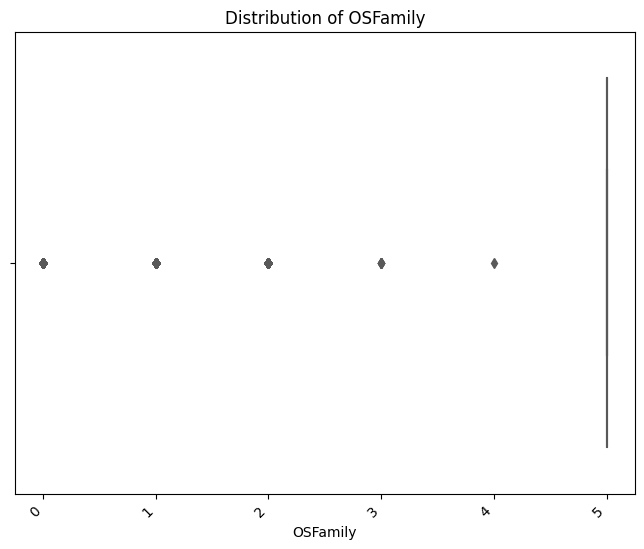

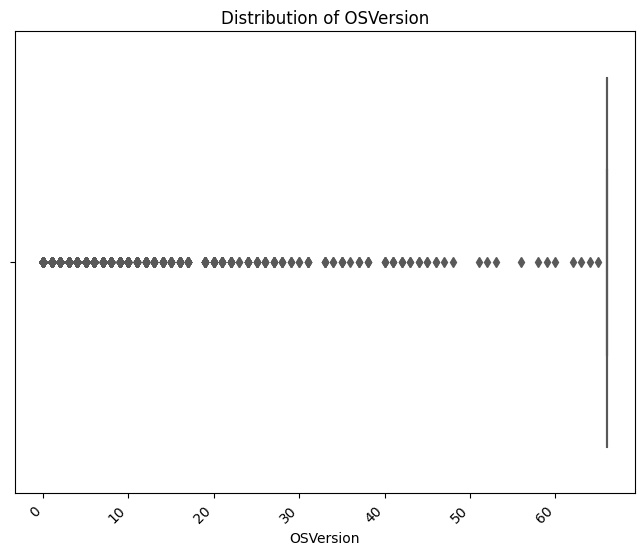

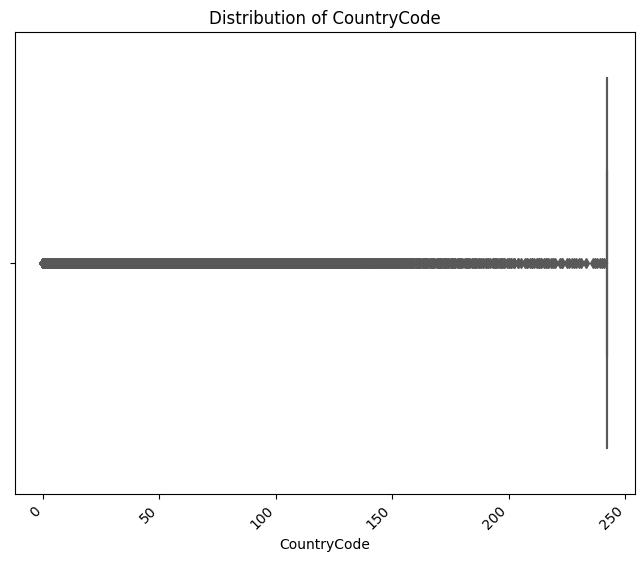

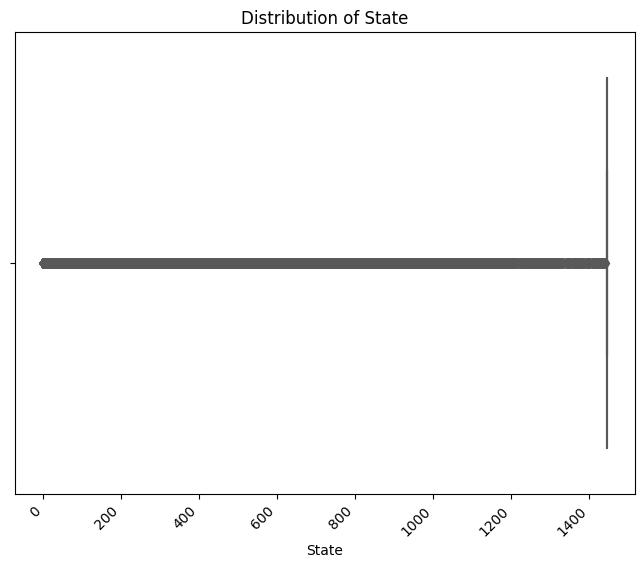

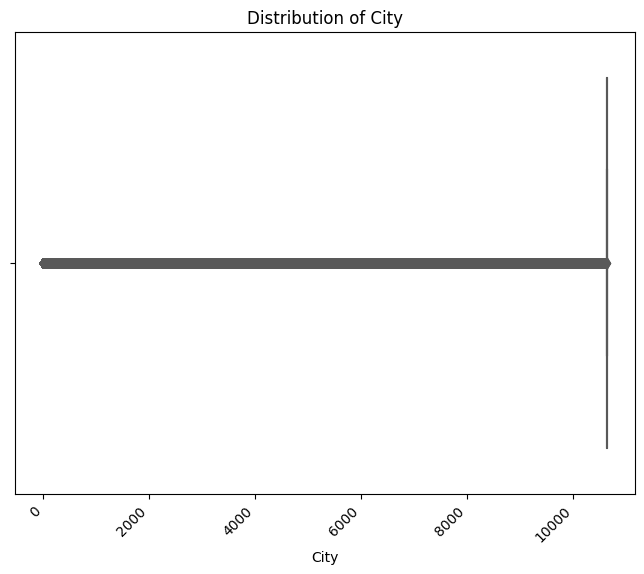

In [23]:
for col in numeric_features:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha="right")  
    plt.show()

In [24]:
# Preprocessing

In [25]:
# Finding null values
df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [26]:
# Droping some columns which is not important and missing values more than 50%

columns_drop = ["Id",  "MitreTechniques","ActionGrouped", "AccountObjectId", "ActionGranular","EmailClusterId", "ThreatFamily", "ResourceType", "Roles", "AntispamDirection","SuspicionLevel", "LastVerdict"]  
df1 = df.drop(columns=columns_drop)

In [27]:
# Handling missing values

In [28]:
df1.isnull().sum()

OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         51340
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

After dropping some columns I have only one missing column

In [29]:
# Filling missing values for IncidentGrade column  with the mode value
if 'IncidentGrade' in df1.columns:
    modevalue = df1['IncidentGrade'].mode()[0] 
    df1['IncidentGrade'].fillna(modevalue, inplace=True)

/tmp/ipykernel_31/2550114886.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['IncidentGrade'].fillna(modevalue, inplace=True)


In [30]:
# Now checking the null values
df1.isnull().sum()

OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

Now there is no missing values present

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 33 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   OrgId               int64 
 1   IncidentId          int64 
 2   AlertId             int64 
 3   Timestamp           object
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  AccountUpn          int64 
 16  AccountName         int64 
 17  DeviceName          int64 
 18  NetworkMessageId    int64 
 19  RegistryKey         int64 
 20  RegistryValueName   int64 
 21  RegistryValueData   int64 
 22  ApplicationId       int64 
 23  ApplicationName     int64 
 24  OAuthApplicationId  int64 
 25  FileName          

In [32]:
df1.head()

,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3
1,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [33]:
# sampling the data into 20 percent since the data is very large
from sklearn.model_selection import train_test_split

sample_df, _ = train_test_split(df1, test_size=0.80, stratify=df1['IncidentGrade'], random_state=42)

Here i am using stratify sampling here class distribution in train and test sets is similar to the original dataset

In [34]:
df2=sample_df
df2.head()

,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
2407538,70,5636,16156,2024-06-09T18:10:49.000Z,1,1,InitialAccess,BenignPositive,Url,Related,98799,138268,360606,86835,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
7741501,677,32632,801861,2024-06-03T12:09:23.000Z,2534,7743,Malware,TruePositive,File,Related,98799,7085,360606,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,6927,5727,3586,5,66,242,1445,10630
3030199,10,49,244,2024-05-24T02:12:16.000Z,12,52,Impact,TruePositive,Ip,Related,98799,138268,1393,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
393707,33,82619,157116,2024-06-15T17:09:15.000Z,1,1,InitialAccess,BenignPositive,Url,Related,98799,138268,360606,71859,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3882447,44,1486,13916,2024-06-14T21:55:06.000Z,50,36,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,1615,453297,153085,45494,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [35]:
# Displaying the value counts of IncidentGrade after sample
df2.IncidentGrade.value_counts()

IncidentGrade
BenignPositive    832431
TruePositive      664543
FalsePositive     406393
Name: count, dtype: int64

In [36]:
#Converting object type to Timestamp and extracting date and time features

if 'Timestamp' in df2.columns:
    df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])  # converting to datetime format
    df2['Year'] = df2['Timestamp'].dt.year  # extracting year 
    df2['Month'] = df2['Timestamp'].dt.month  # extracting month
    df2['Day'] = df2['Timestamp'].dt.day  # extracting  day
    df2['Hour'] = df2['Timestamp'].dt.hour  # extracting hour
    df2['DayOfWeek'] = df2['Timestamp'].dt.dayofweek  # extracting dayofweek
    df2.drop(columns=['Timestamp'], inplace=True)  # droping the original Timestamp column

Here from Timestamp column we are extracting new features like year, month, day, hour and dayofweek 

In [37]:
df2.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,DayOfWeek
2407538,70,5636,16156,1,1,InitialAccess,BenignPositive,Url,Related,98799,138268,360606,86835,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,9,18,6
7741501,677,32632,801861,2534,7743,Malware,TruePositive,File,Related,98799,7085,360606,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,6927,5727,3586,5,66,242,1445,10630,2024,6,3,12,0
3030199,10,49,244,12,52,Impact,TruePositive,Ip,Related,98799,138268,1393,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,24,2,4
393707,33,82619,157116,1,1,InitialAccess,BenignPositive,Url,Related,98799,138268,360606,71859,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,15,17,5
3882447,44,1486,13916,50,36,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,1615,453297,153085,45494,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,14,21,4


In [38]:
# resetting the index because we sampled the data it is not in order
df2 = df2.reset_index(drop=True)
df2.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,DayOfWeek
0,70,5636,16156,1,1,InitialAccess,BenignPositive,Url,Related,98799,138268,360606,86835,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,9,18,6
1,677,32632,801861,2534,7743,Malware,TruePositive,File,Related,98799,7085,360606,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,6927,5727,3586,5,66,242,1445,10630,2024,6,3,12,0
2,10,49,244,12,52,Impact,TruePositive,Ip,Related,98799,138268,1393,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,24,2,4
3,33,82619,157116,1,1,InitialAccess,BenignPositive,Url,Related,98799,138268,360606,71859,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,15,17,5
4,44,1486,13916,50,36,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,1615,453297,153085,45494,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,14,21,4


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903367 entries, 0 to 1903366
Data columns (total 37 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   OrgId               int64 
 1   IncidentId          int64 
 2   AlertId             int64 
 3   DetectorId          int64 
 4   AlertTitle          int64 
 5   Category            object
 6   IncidentGrade       object
 7   EntityType          object
 8   EvidenceRole        object
 9   DeviceId            int64 
 10  Sha256              int64 
 11  IpAddress           int64 
 12  Url                 int64 
 13  AccountSid          int64 
 14  AccountUpn          int64 
 15  AccountName         int64 
 16  DeviceName          int64 
 17  NetworkMessageId    int64 
 18  RegistryKey         int64 
 19  RegistryValueName   int64 
 20  RegistryValueData   int64 
 21  ApplicationId       int64 
 22  ApplicationName     int64 
 23  OAuthApplicationId  int64 
 24  FileName            int64 
 25  FolderPath        

In [40]:
# Selecting the categorical features for convertig into numeriacal
categ_columns = df2.select_dtypes(include=['object']).columns
categ_columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole'], dtype='object')

In [41]:
# Converting categorical column to numerical for that labelencoder is importing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Applying LabelEncoder to each categorical column
for col in categ_columns:
    df2[col] = le.fit_transform(df2[col])
    print(f"Label encoded column '{col}'.")

Label encoded column 'Category'.
Label encoded column 'IncidentGrade'.
Label encoded column 'EntityType'.
Label encoded column 'EvidenceRole'.


In [42]:
df2.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,DayOfWeek
0,70,5636,16156,1,1,10,0,24,1,98799,138268,360606,86835,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,9,18,6
1,677,32632,801861,2534,7743,12,2,7,1,98799,7085,360606,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,6927,5727,3586,5,66,242,1445,10630,2024,6,3,12,0
2,10,49,244,12,52,9,2,11,1,98799,138268,1393,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,24,2,4
3,33,82619,157116,1,1,10,0,24,1,98799,138268,360606,71859,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,15,17,5
4,44,1486,13916,50,36,7,0,14,0,98799,138268,360606,160396,441377,1615,453297,153085,45494,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,14,21,4


In [43]:
df2.IncidentGrade.value_counts()

IncidentGrade
0    832431
2    664543
1    406393
Name: count, dtype: int64

After label encoder the classes converted to 
- BenignPositive-->0
- TruePositive-->2   
- FalsePositive-->1

In [44]:
# Splitting the data into x and y
x=df2.drop('IncidentGrade', axis=1)
y=df2['IncidentGrade']

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [46]:
# Class distribution in the train and test sets
print("y_train:")
print(y_train.value_counts())
print("y_test:")
print(y_test.value_counts())

y_train:
IncidentGrade
0    582701
2    465180
1    284475
Name: count, dtype: int64
y_test:
IncidentGrade
0    249730
2    199363
1    121918
Name: count, dtype: int64


In [47]:
X_train.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,DayOfWeek
110812,7,4436,1034,21,70,9,11,1,98799,138268,9645,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,5,25,9,5
134877,21,414,722481,3,4,16,11,1,98799,138268,51365,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,8,5,5
986636,487,4510,21361,1,1,10,24,1,98799,138268,360606,27779,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,5,21,2
576987,54,12374,16069,167,2847,7,14,0,98799,138268,360606,160396,441377,437485,453297,153085,289996,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,4,17,1
1066647,296,19648,47518,200,176,16,11,1,98799,138268,1361,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,7,8,4


In [48]:
X_test.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,DayOfWeek
930182,518,750,1583694,698,938,12,7,1,98799,942,360606,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,133377,48065,3586,5,66,242,1445,10630,2024,6,3,6,0
787364,31,241682,441742,93,198,7,11,1,98799,138268,8,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,4,18,1
636019,16,130643,229787,55,37,7,14,0,98799,138268,360606,160396,441377,319914,453297,153085,248750,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,3,13,0
1392218,52,2834,1956,188,152,4,25,0,98799,138268,360606,160396,290360,361384,352079,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,11,16,1
80502,81,163380,452480,6,5,10,13,1,98799,138268,360606,160396,441377,673934,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,11,15,1


### Scaling 

In [49]:
# Since data is large values and all the data is in different scales for that we importing standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature selection

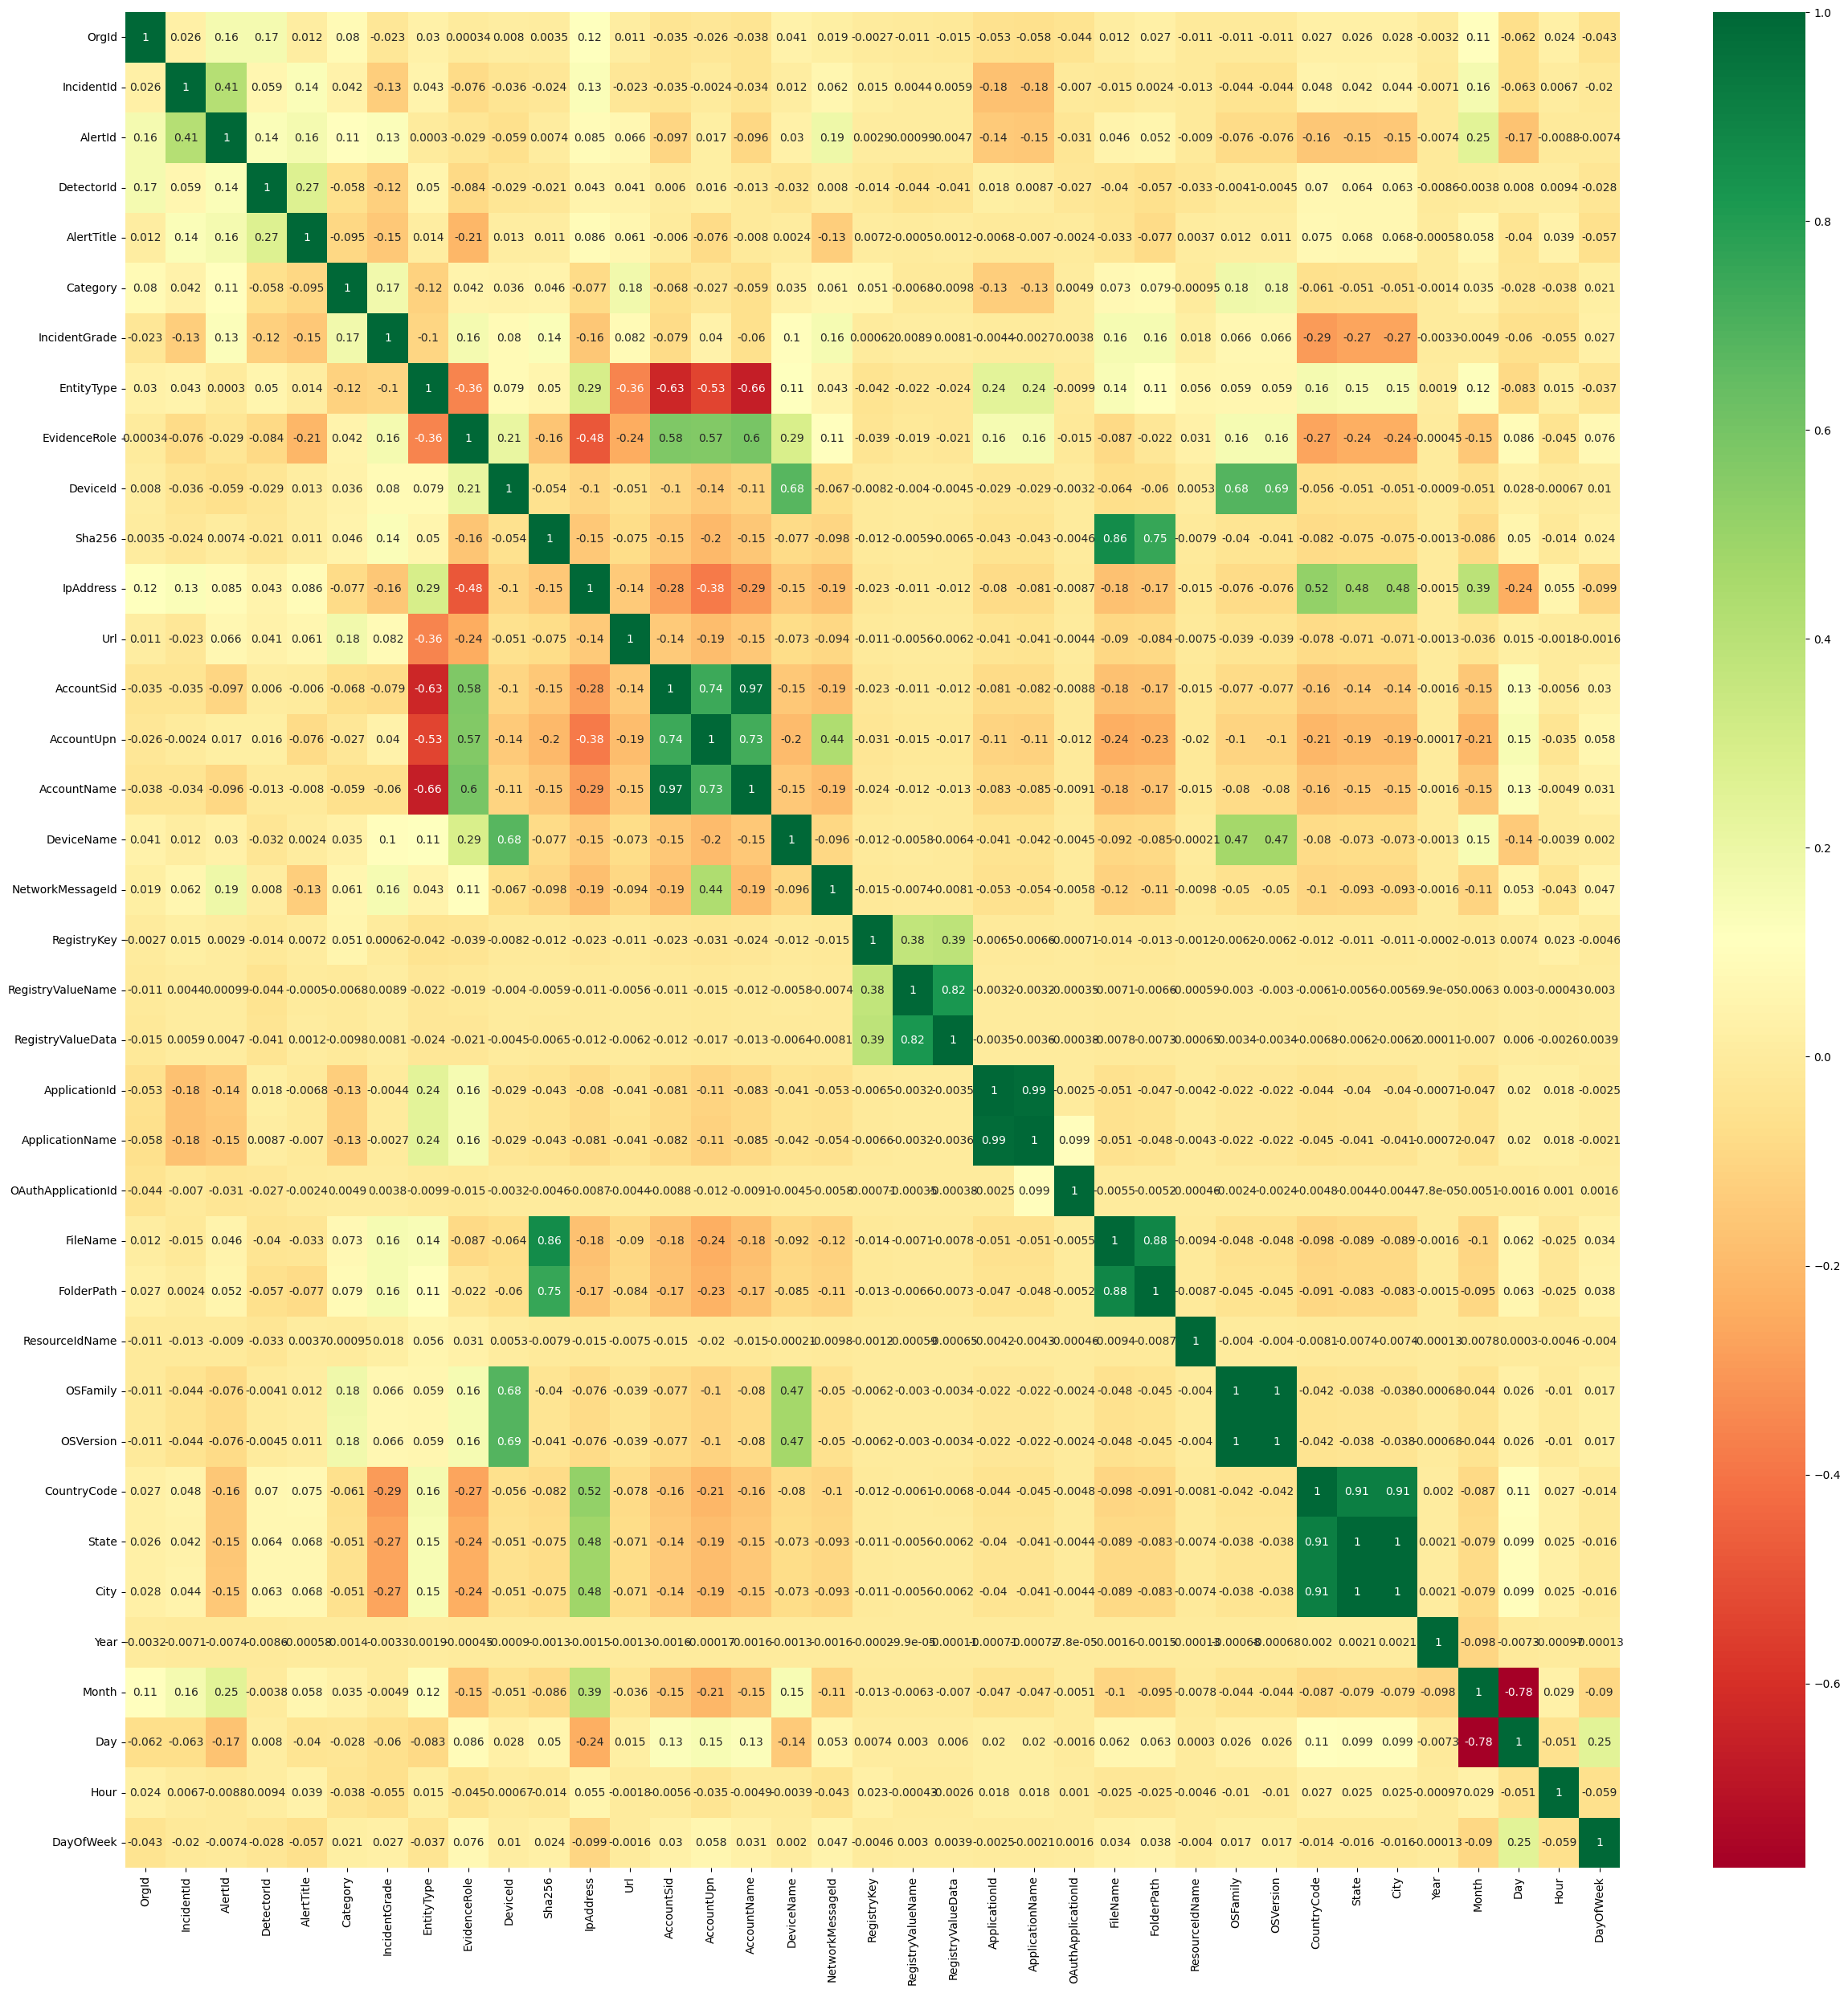

In [50]:
# Heat map for Correlation
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(), annot = True, cmap = "RdYlGn")
plt.show()

EntityType column has some negative correltion with columns AccontSid,AccountUpn, AccountName and Sha256 has positive correlation with Filename and folderpath

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

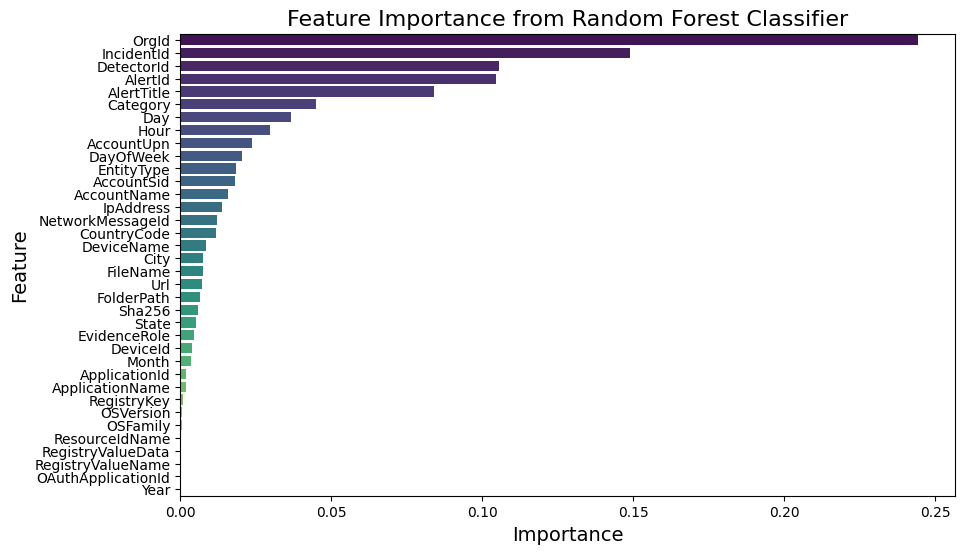

In [52]:
# Geting feature importance
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# Sorting the dataframe based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

# Model Building

## Decision Tree

Accuracy: 0.9758
Macro Precision: 0.9737
Macro Recall: 0.9734
Macro F1 Score: 0.9736

Confusion Matrix:
 [[244839   2640   2251]
 [  2791 117151   1976]
 [  2248   1934 195181]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    249730
           1       0.96      0.96      0.96    121918
           2       0.98      0.98      0.98    199363

    accuracy                           0.98    571011
   macro avg       0.97      0.97      0.97    571011
weighted avg       0.98      0.98      0.98    571011



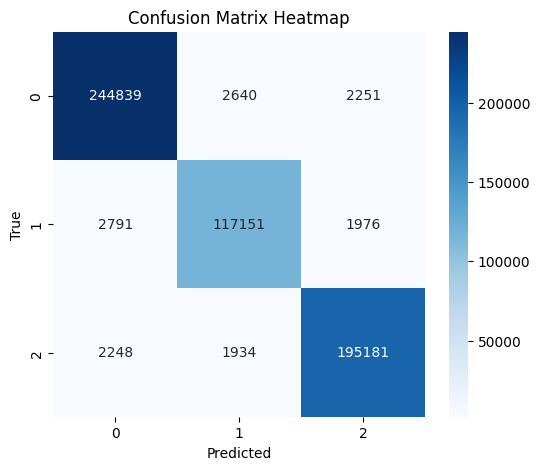

In [53]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt.predict(X_test_scaled)

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='macro')
recall = recall_score(y_test, y_pred_dt, average='macro')
f1 = f1_score(y_test, y_pred_dt, average='macro')
cm = confusion_matrix(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Visualize the Confusion Matrix (Heatmap)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [54]:
# Calculate train score
train_score = dt.score(X_train_scaled, y_train)
print(train_score)
# Calculate test score
test_score = dt.score(X_test_scaled, y_test)
print(test_score)

1.0
0.9757622882921695


# Random Forest

Accuracy: 0.9612
Macro Precision: 0.9629
Macro Recall: 0.9556
Macro F1 Score: 0.9590

Confusion Matrix:
 [[244921   2330   2479]
 [  6325 113463   2130]
 [  6937   1940 190486]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96    249730
           1       0.96      0.93      0.95    121918
           2       0.98      0.96      0.97    199363

    accuracy                           0.96    571011
   macro avg       0.96      0.96      0.96    571011
weighted avg       0.96      0.96      0.96    571011



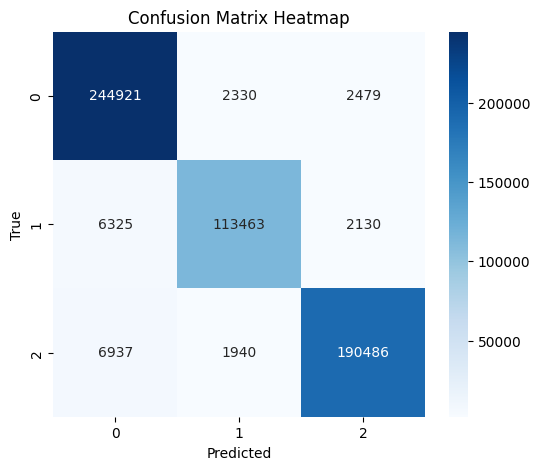

In [55]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')
cm = confusion_matrix(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Visualize the Confusion Matrix (Heatmap)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [56]:
# Calculating train score
train_score = rf.score(X_train_scaled, y_train)
print(train_score)
# Calculating test score
test_score = rf.score(X_test_scaled, y_test)
print(test_score)

0.999996997799387
0.9612249151067143


Traian and test score for random forest 
train_score= 0.999996997799387
test_score= 0.9612249151067143

Evalution results from Random forest
- Accuracy: 0.9612
- Macro Precision: 0.9629
- Macro Recall: 0.9556
- Macro F1 Score: 0.9590

# Hyperparameter tuning the random forest model

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=10, n_estimators=210; total time= 7.0min
Best Hyperparameters: {'n_estimators': 110, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 17}
[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=110; total time= 4.2min
[CV] END max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time= 2.9min
Accuracy: 0.8581
Macro Precision: 0.9058
Macro Recall: 0.8256
Macro F1 Score: 0.8501

Confusion Matrix:
 [[246663   1286   1781]
 [ 35757  84302   1859]
 [ 39313   1045 159005]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.86    249730
           1       0.97      0.69      0.81    121918
           2       0.98      0.80      0.88    199363

    accuracy                           0.86    571011
   macro avg       0.91      0.83      0.85    571011
w

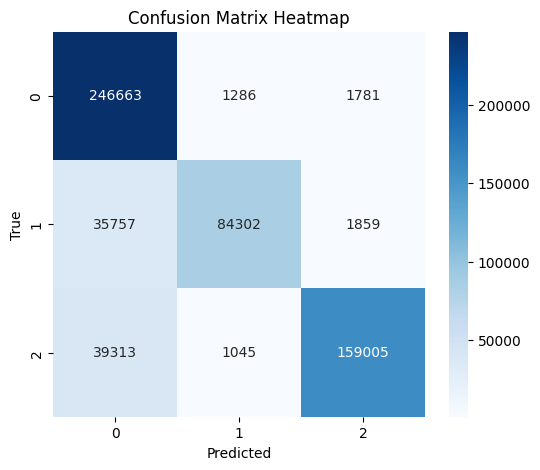

[CV] END max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=110; total time= 4.5min
[CV] END max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time= 2.7min
[CV] END max_depth=14, min_samples_leaf=2, min_samples_split=10, n_estimators=210; total time= 7.5min


In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 20),  
    'max_depth': np.arange(5, 20, 1),        
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],                 
}

# Initializing the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initializing RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=3, cv=2, random_state=42,verbose=2, n_jobs=-1)

# Fit the  RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the Random Forest Classifier 
best_rf = random_search.best_estimator_

# Predictions using the best model
y_pred_rf = best_rf.predict(X_test_scaled)

# Metrics Calculation
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')
cm = confusion_matrix(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Visualize the Confusion Matrix (Heatmap)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [64]:
# Calculating train score
train_score = best_rf.score(X_train_scaled, y_train)
print(train_score)
# Calculating test score
test_score = best_rf.score(X_test_scaled, y_test)
print(test_score)

0.8619760784655153
0.8580745379686205


After hyper parameter tuning Train and test score for random forest  is
train_score= 0.8619760784655153
test_score= 0.8580745379686205   now the model is not  overfitting and 
Accuracy= 0.8581
Macro Precision= 0.9058
Macro Recall= 0.8256
Macro F1 Score= 0.8501

In [65]:
# saving the model
import pickle

with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

In [67]:
# Saving the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [71]:
# Prediction on sample data

# Loading Saved Scaler
with open('/kaggle/working/scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Loading Saved Model
with open('/kaggle/working/best_rf_model.pkl', 'rb') as file:
    best_rf = pickle.load(file)

# test sample[OrgId IncidentId AlertId DetectorId AlertTitle Category EntityType EvidenceRole DeviceId Sha256 IpAddress Url AccountSid AccountUpn AccountName DeviceName NetworkMessageId RegistryKey RegistryValueName RegistryValueData ApplicationId ApplicationName OAuthApplicationId FileName FolderPath ResourceIdName OSFamily OSVersion CountryCode State City Year Month Day Hour DayOfWeek]
X_new = np.array([
    [518, 750, 1583694, 698, 938, 12, 7, 1, 98799, 942, 360606, 160396,
     441377, 673934, 453297, 153085, 529644, 1631, 635, 860, 2251, 3421, 881,
     133377, 48065, 3586, 5, 66, 242, 1445, 10630, 2024, 6, 3, 6, 0]
])

# Scaling the test sample input
X_new_scaled = scaler.transform(X_new)

# Prediction
y_pred = best_rf.predict(X_new_scaled)

# Output of the prediction
print("Predicted Label:", y_pred[0])


Predicted Label: 0


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


- BenignPositive->0
- TruePositive->2
- FalsePositive->1

here it is predicting as BenignPositive